# LSTM - datos 5 dias

Cargamos los datos:

In [2]:
run Datos-5dias.ipynb

Construimos el modelo:

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from sklearn.metrics import mean_absolute_error,r2_score
from tensorflow import keras

In [4]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


# CONJUNTO DE DATOS 1

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

Modelo 100 neuronas:

In [5]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 11, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 11, 33)            11088     
                                                                 
 lstm_3 (LSTM)               (None, 25)                5900      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [6]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 7s 23ms/step - loss: 14809.4961
Epoch 2/100
48/48 [==============================] - 1s 23ms/step - loss: 7743.7207
Epoch 3/100
48/48 [==============================] - 1s 20ms/step - loss: 6438.6680
Epoch 4/100
48/48 [==============================] - 1s 20ms/step - loss: 6022.9888
Epoch 5/100
48/48 [==============================] - 1s 21ms/step - loss: 3327.4355
Epoch 6/100
48/48 [==============================] - 1s 19ms/step - loss: 2361.5234
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 2425.7939
Epoch 8/100
48/48 [==============================] - 1s 19ms/step - loss: 2952.7922
Epoch 9/100
48/48 [==============================] - 1s 19ms/step - loss: 3769.6731
Epoch 10/100
48/48 [==============================] - 1s 19ms/step - loss: 2473.5229
Epoch 11/100
48/48 [==============================] - 1s 19ms/step - loss: 3262.8921
Epoch 12/100
48/48 [==============================] - 1s 20ms/step - loss

In [7]:
y_predLSTM100 = modelLSTM100.predict(testX1)

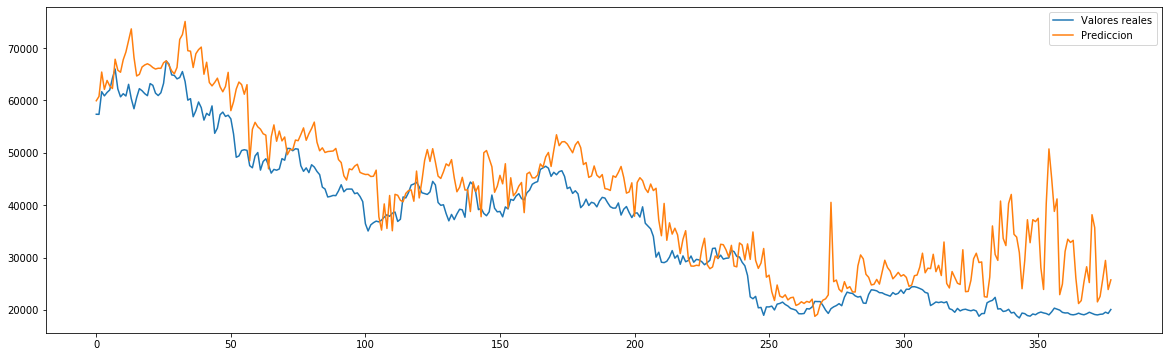

In [8]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [9]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 5800.011823743387
R-cuadrado: 0.717453406449009
Tasa de acierto de subida: 0.4960212201591512


Modelo 64 neuronas

In [10]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 11, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 11, 32)            12416     
                                                                 
 lstm_6 (LSTM)               (None, 11, 21)            4536      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2432      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [11]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 6s 16ms/step - loss: 15319.7842
Epoch 2/100
48/48 [==============================] - 1s 16ms/step - loss: 12552.6074
Epoch 3/100
48/48 [==============================] - 1s 16ms/step - loss: 3384.5076
Epoch 4/100
48/48 [==============================] - 1s 16ms/step - loss: 2736.9819
Epoch 5/100
48/48 [==============================] - 1s 16ms/step - loss: 5389.9946
Epoch 6/100
48/48 [==============================] - 1s 17ms/step - loss: 3369.9844
Epoch 7/100
48/48 [==============================] - 1s 17ms/step - loss: 3522.2913
Epoch 8/100
48/48 [==============================] - 1s 16ms/step - loss: 3332.4189
Epoch 9/100
48/48 [==============================] - 1s 16ms/step - loss: 3070.2327
Epoch 10/100
48/48 [==============================] - 1s 16ms/step - loss: 4722.0781
Epoch 11/100
48/48 [==============================] - 1s 16ms/step - loss: 8893.4863
Epoch 12/100
48/48 [==============================] - 1s 16ms/step - los

In [12]:
y_predLSTM64 = modelLSTM64.predict(testX1)

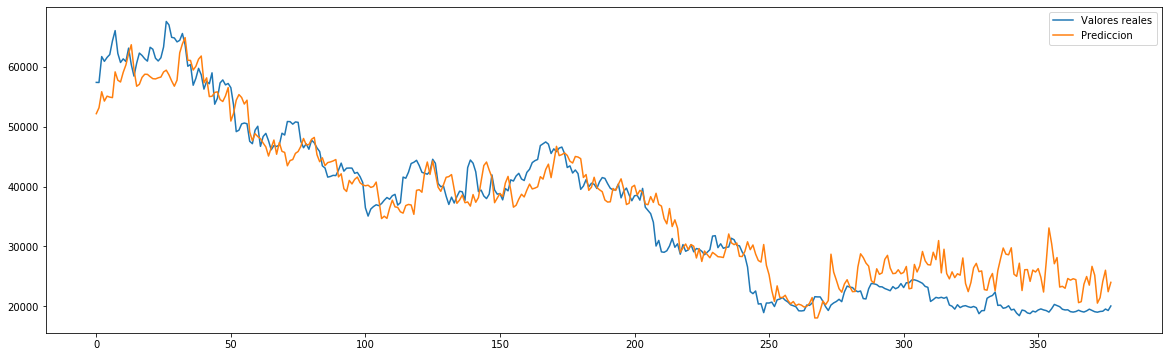

In [13]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [14]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 3250.4192511987435
R-cuadrado: 0.9129102895895496
Tasa de acierto de subida: 0.506631299734748


Modelo 32 neuronas:

In [15]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 11, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 11, 16)            3136      
                                                                 
 lstm_10 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 640       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [16]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 5s 13ms/step - loss: 15312.8418
Epoch 2/100
48/48 [==============================] - 1s 13ms/step - loss: 14143.2314
Epoch 3/100
48/48 [==============================] - 1s 13ms/step - loss: 12217.8105
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 9952.1924
Epoch 5/100
48/48 [==============================] - 1s 14ms/step - loss: 7727.2383
Epoch 6/100
48/48 [==============================] - 1s 14ms/step - loss: 10625.3809
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 11636.8818
Epoch 8/100
48/48 [==============================] - 1s 14ms/step - loss: 10550.2227
Epoch 9/100
48/48 [==============================] - 1s 14ms/step - loss: 7521.9854
Epoch 10/100
48/48 [==============================] - 1s 14ms/step - loss: 8080.4409
Epoch 11/100
48/48 [==============================] - 1s 14ms/step - loss: 6608.8154
Epoch 12/100
48/48 [==============================] - 1s 13ms/step -

In [17]:
y_predLSTM32 = modelLSTM32.predict(testX1)

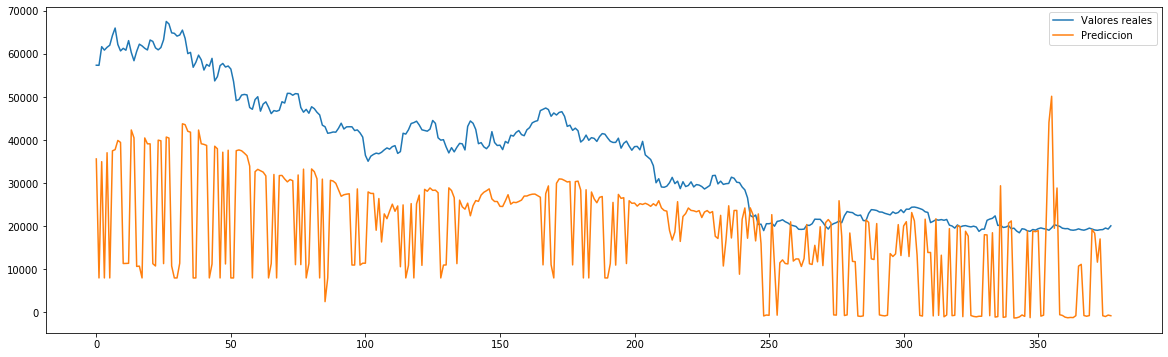

In [18]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [19]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 17625.570818258617
R-cuadrado: -1.3695687701889026
Tasa de acierto de subida: 0.5570291777188329


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [20]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

Modelo 100 neuronas:

In [21]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 6s 23ms/step - loss: 13094.3359 - mae: 13094.3359
Epoch 2/100
48/48 [==============================] - 1s 23ms/step - loss: 5094.4810 - mae: 5094.4810
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 3986.8042 - mae: 3986.8042
Epoch 4/100
48/48 [==============================] - 1s 23ms/step - loss: 4258.8496 - mae: 4258.8496
Epoch 5/100
48/48 [==============================] - 1s 27ms/step - loss: 5131.1011 - mae: 5131.1011
Epoch 6/100
48/48 [==============================] - 1s 25ms/step - loss: 4363.7534 - mae: 4363.7534
Epoch 7/100
48/48 [==============================] - 1s 25ms/step - loss: 3513.4897 - mae: 3513.4897
Epoch 8/100
48/48 [==============================] - 1s 26ms/step - loss: 2707.7090 - mae: 2707.7090
Epoch 9/100
48/48 [==============================] - 1s 25ms/step - loss: 4232.1489 - mae: 4232.1489
Epoch 10/100
48/48 [==============================] - 1s 25ms/step - loss: 4228.7915 - ma

In [23]:
y_predLSTM100 = modelLSTM100.predict(testX1)

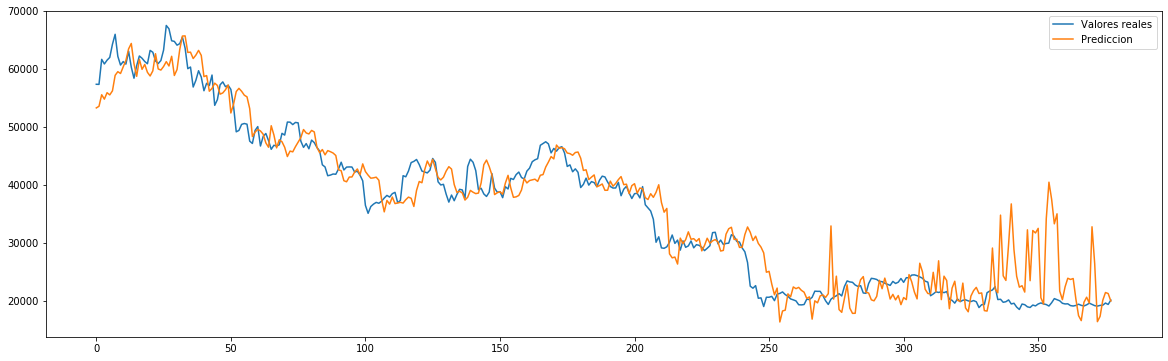

In [24]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [25]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2991.04486369461
R-cuadrado: 0.9053175586361317
Tasa de acierto de subida: 0.5358090185676393


Modelo 64 neuronas

In [26]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_18 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [27]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 6s 19ms/step - loss: 14187.4785 - mae: 14187.4785
Epoch 2/100
48/48 [==============================] - 1s 19ms/step - loss: 5759.3369 - mae: 5759.3369
Epoch 3/100
48/48 [==============================] - 1s 19ms/step - loss: 5274.1699 - mae: 5274.1699
Epoch 4/100
48/48 [==============================] - 1s 19ms/step - loss: 3894.6445 - mae: 3894.6445
Epoch 5/100
48/48 [==============================] - 1s 19ms/step - loss: 2626.3171 - mae: 2626.3171
Epoch 6/100
48/48 [==============================] - 1s 19ms/step - loss: 3208.0100 - mae: 3208.0100
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 4566.2046 - mae: 4566.2046
Epoch 8/100
48/48 [==============================] - 1s 18ms/step - loss: 3202.8008 - mae: 3202.8008
Epoch 9/100
48/48 [==============================] - 1s 19ms/step - loss: 3041.4692 - mae: 3041.4692
Epoch 10/100
48/48 [==============================] - 1s 19ms/step - loss: 3436.5652 - ma

In [28]:
y_predLSTM64 = modelLSTM64.predict(testX1)

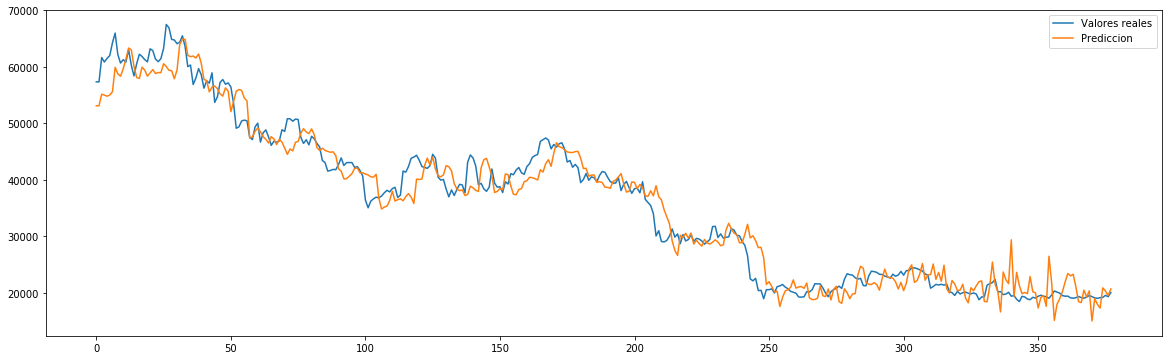

In [29]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [30]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2307.49111348793
R-cuadrado: 0.9531082598275249
Tasa de acierto de subida: 0.4827586206896552


Modelo 32 neuronas:

In [31]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_21 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_22 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_23 (LSTM)              (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [32]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 6s 15ms/step - loss: 15032.6865 - mae: 15032.6865
Epoch 2/100
48/48 [==============================] - 1s 15ms/step - loss: 10506.4551 - mae: 10506.4551
Epoch 3/100
48/48 [==============================] - 1s 15ms/step - loss: 4611.4502 - mae: 4611.4502
Epoch 4/100
48/48 [==============================] - 1s 15ms/step - loss: 3609.8923 - mae: 3609.8923
Epoch 5/100
48/48 [==============================] - 1s 15ms/step - loss: 3493.3879 - mae: 3493.3879
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 3298.3137 - mae: 3298.3137
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 3540.1404 - mae: 3540.1404
Epoch 8/100
48/48 [==============================] - 1s 15ms/step - loss: 2528.5330 - mae: 2528.5330
Epoch 9/100
48/48 [==============================] - 1s 15ms/step - loss: 2395.8323 - mae: 2395.8323
Epoch 10/100
48/48 [==============================] - 1s 15ms/step - loss: 2345.9192 - 

In [33]:
y_predLSTM32 = modelLSTM32.predict(testX1)

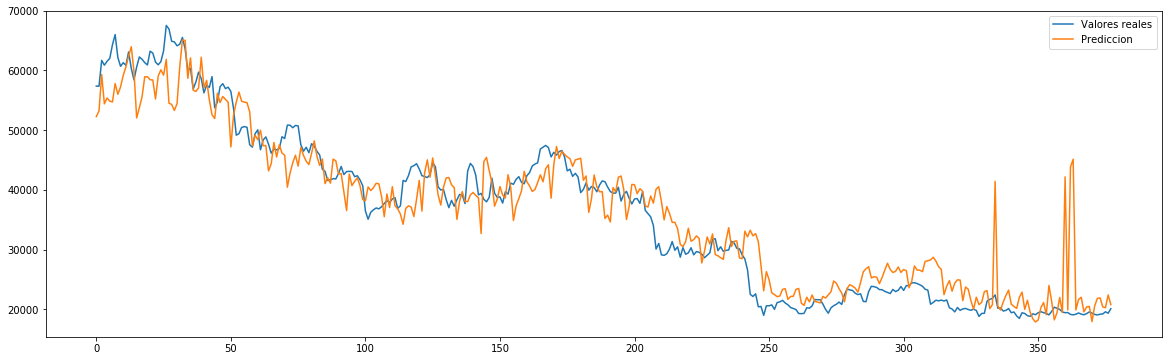

In [34]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [35]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 3159.9341743138234
R-cuadrado: 0.8969922739872728
Tasa de acierto de subida: 0.5278514588859416


### EXPERIMENTO 3: Modelo 10 capas

In [36]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model


Modelo 100 neuronas:

In [37]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_26 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_27 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_28 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_29 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_30 (LSTM)              (None, 11, 14)           

In [38]:
y_predLSTM100 = modelLSTM100.predict(testX1)

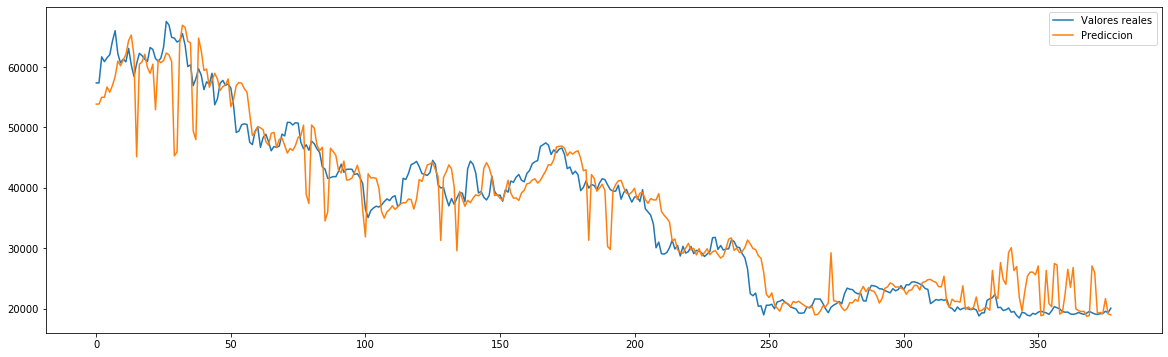

In [39]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [40]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2797.232047164352
R-cuadrado: 0.9182661798293064
Tasa de acierto de subida: 0.5358090185676393


Modelo 64 neuronas:

In [41]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_34 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_35 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_36 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_37 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_38 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_39 (LSTM)              (None, 11, 9)            

In [42]:
y_predLSTM64 = modelLSTM64.predict(testX1)

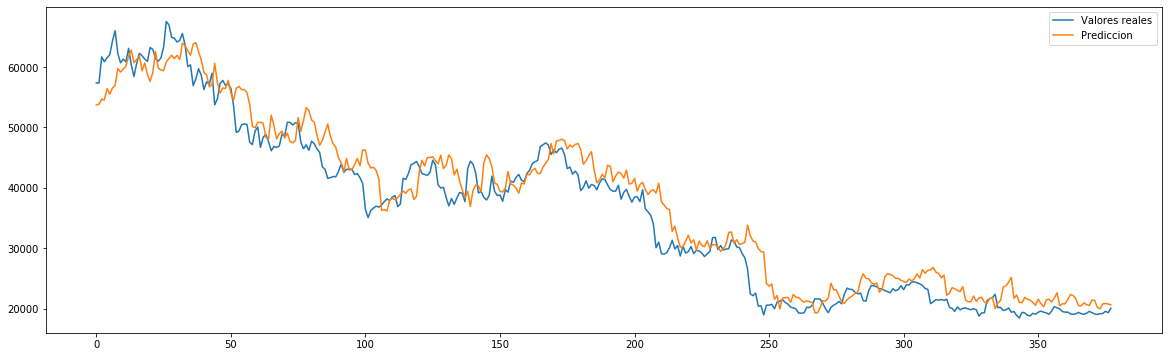

In [43]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [44]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2729.858349867725
R-cuadrado: 0.9361608477665407
Tasa de acierto de subida: 0.5145888594164456


Modelo 32 neuronas:

In [45]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_43 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_44 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_45 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_46 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_47 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_48 (LSTM)              (None, 11, 5)            

48/48 [==============================] - 1s 28ms/step - loss: 15427.3223 - mae: 15427.3223
Epoch 64/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3184 - mae: 15427.3184
Epoch 65/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 66/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 67/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3193 - mae: 15427.3193
Epoch 68/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 69/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3193 - mae: 15427.3193
Epoch 70/100
48/48 [==============================] - 1s 30ms/step - loss: 15427.3252 - mae: 15427.3252
Epoch 71/100
48/48 [==============================] - 1s 30ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 72/100
48/48 [==============================] - 1s 31ms/step - loss: 15

In [46]:
y_predLSTM32 = modelLSTM32.predict(testX1)

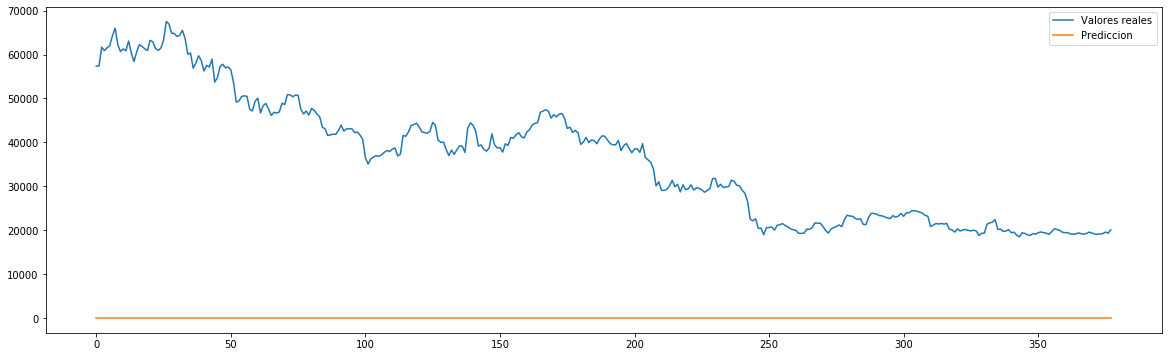

In [47]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [48]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 36038.24775132275
R-cuadrado: -6.664063279599342
Tasa de acierto de subida: 0.53315649867374


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [49]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_52 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_53 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_54 (LSTM)              (None, 25)                5900      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [50]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 6s 21ms/step - loss: 14325.0195
Epoch 2/100
48/48 [==============================] - 1s 21ms/step - loss: 11750.8555
Epoch 3/100
48/48 [==============================] - 1s 22ms/step - loss: 9510.4092
Epoch 4/100
48/48 [==============================] - 1s 21ms/step - loss: 9541.3086
Epoch 5/100
48/48 [==============================] - 1s 22ms/step - loss: 9112.1143
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 8095.0776
Epoch 7/100
48/48 [==============================] - 1s 21ms/step - loss: 6688.6426
Epoch 8/100
48/48 [==============================] - 1s 21ms/step - loss: 6749.8999
Epoch 9/100
48/48 [==============================] - 1s 22ms/step - loss: 6998.7930
Epoch 10/100
48/48 [==============================] - 1s 22ms/step - loss: 6493.2256
Epoch 11/100
48/48 [==============================] - 1s 22ms/step - loss: 5922.0894
Epoch 12/100
48/48 [==============================] - 1s 21ms/step - los

In [51]:
y_predLSTM100 = modelLSTM100.predict(testX1)

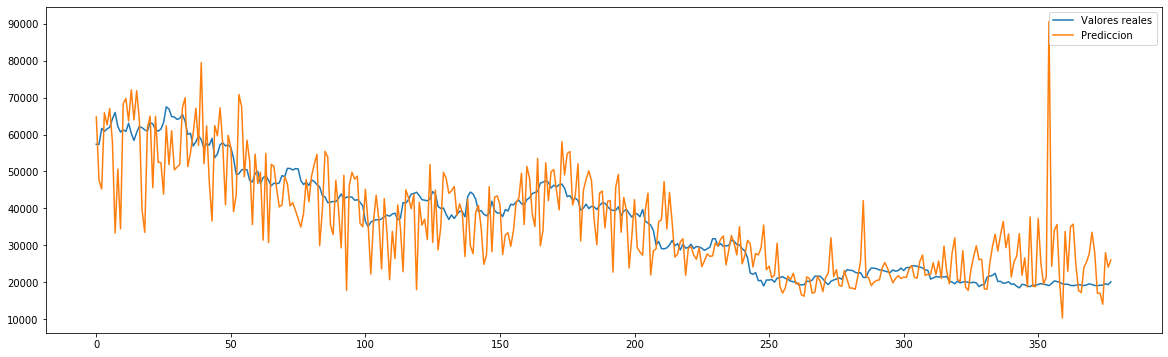

In [52]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [53]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 6597.344380477017
R-cuadrado: 0.5595395732096942
Tasa de acierto de subida: 0.4907161803713528


Modelo 64 neuronas

In [54]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_56 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_57 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_58 (LSTM)              (None, 16)                2432      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [55]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 7s 17ms/step - loss: 15051.0566
Epoch 2/100
48/48 [==============================] - 1s 17ms/step - loss: 14702.9951
Epoch 3/100
48/48 [==============================] - 1s 17ms/step - loss: 14591.6641
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 14505.0137
Epoch 5/100
48/48 [==============================] - 1s 17ms/step - loss: 14365.6387
Epoch 6/100
48/48 [==============================] - 1s 17ms/step - loss: 14307.1279
Epoch 7/100
48/48 [==============================] - 1s 17ms/step - loss: 14290.1182
Epoch 8/100
48/48 [==============================] - 1s 17ms/step - loss: 14246.6406
Epoch 9/100
48/48 [==============================] - 1s 17ms/step - loss: 14129.5107
Epoch 10/100
48/48 [==============================] - 1s 17ms/step - loss: 13993.2617
Epoch 11/100
48/48 [==============================] - 1s 17ms/step - loss: 13802.9199
Epoch 12/100
48/48 [==============================] - 1s 18ms/s

Epoch 97/100
48/48 [==============================] - 1s 17ms/step - loss: 3442.6145
Epoch 98/100
48/48 [==============================] - 1s 17ms/step - loss: 3437.4988
Epoch 99/100
48/48 [==============================] - 1s 17ms/step - loss: 3405.4253
Epoch 100/100
12/12 [==============================] - 1s 8ms/step - loss: 6985.6514


In [56]:
y_predLSTM64 = modelLSTM64.predict(testX1)

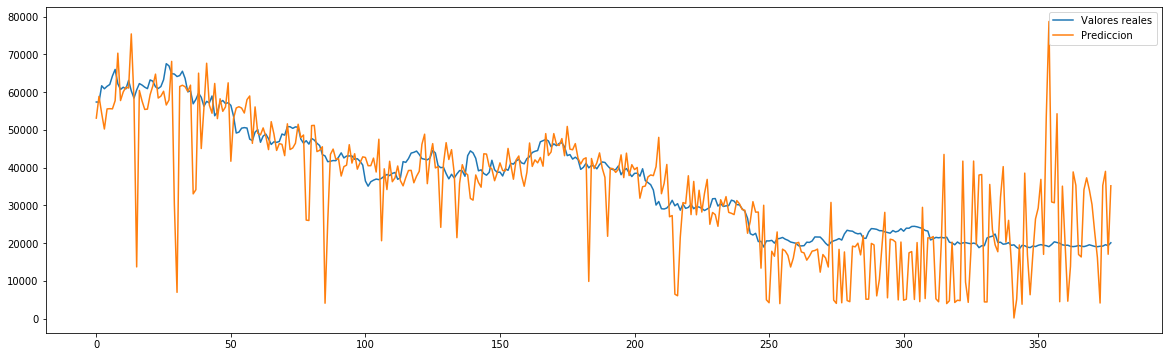

In [57]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [58]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 6985.6516824744485
R-cuadrado: 0.4195267731918523
Tasa de acierto de subida: 0.5358090185676393


Modelo 32 neuronas:

In [59]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_60 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_61 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_62 (LSTM)              (None, 8)                 640       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [60]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 6s 14ms/step - loss: 15440.9912
Epoch 2/100
48/48 [==============================] - 1s 14ms/step - loss: 15438.9434
Epoch 3/100
48/48 [==============================] - 1s 14ms/step - loss: 15436.7148
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 15433.9590
Epoch 5/100
48/48 [==============================] - 1s 14ms/step - loss: 15433.2549
Epoch 6/100
48/48 [==============================] - 1s 14ms/step - loss: 15432.2949
Epoch 7/100
48/48 [==============================] - 1s 14ms/step - loss: 15431.5723
Epoch 8/100
48/48 [==============================] - 1s 14ms/step - loss: 15430.0684
Epoch 9/100
48/48 [==============================] - 1s 14ms/step - loss: 15429.5684
Epoch 10/100
48/48 [==============================] - 1s 14ms/step - loss: 15431.4463
Epoch 11/100
48/48 [==============================] - 1s 14ms/step - loss: 15432.6787
Epoch 12/100
48/48 [==============================] - 1s 14ms/s

In [61]:
y_predLSTM32 = modelLSTM32.predict(testX1)

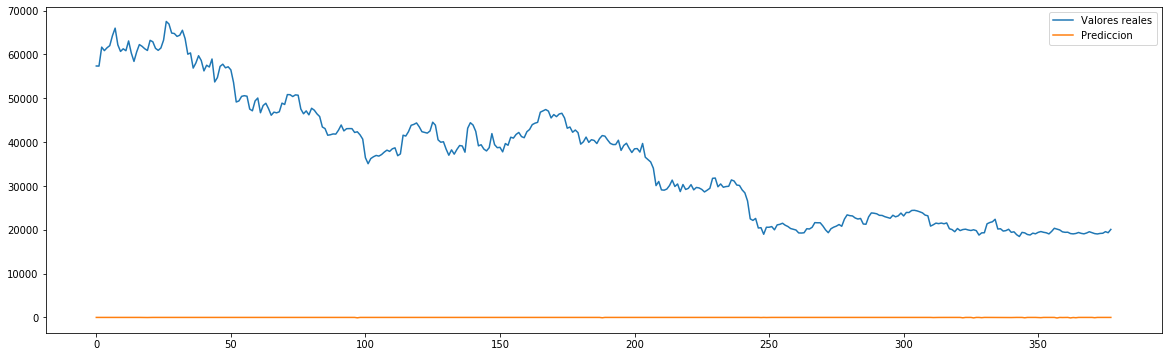

In [62]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [63]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 36041.807019641994
R-cuadrado: -6.664950129018406
Tasa de acierto de subida: 0.47214854111405835


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [64]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_64 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_65 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 7s 30ms/step - loss: 12388.9863 - mae: 12388.9863
Epoch 2/100
48/48 [==============================] - 1s 30ms/step - loss: 9157.2656 - mae: 9157.2656
Epoch 3/100
48/48 [==============================] - 1s 29ms/step - loss: 5741.5742 - mae: 5741.5742
Epoch 4/100
48/48 [==============================] - 1s 29ms/step - loss: 5311.3413 - mae: 5311.3413
Epoch 5/100
48/48 [==============================] - 1s 29ms/step - loss: 5256.4692 - mae: 5256.4692
Epoch 6/100
48/48 [==============================] - 1s 29ms/step - loss: 4799.2070 - mae: 4799.2070
Epoch 7/100
48/48 [==============================] - 1s 28ms/step - loss: 4819.6431 - mae: 4819.6431
Epoch 8/100
48/48 [==============================] - 1s 29ms/step - loss: 3631.7002 - mae: 3631.7002
Epoch 9/100
48/48 [==============================] - 1s 29ms/step - loss: 3900.5583 - mae: 3900.5583
Epoch 10/100
48/48 [==============================] - 1s 29ms/step - loss: 4386.7417 - ma

In [66]:
y_predLSTM100 = modelLSTM100.predict(testX1)

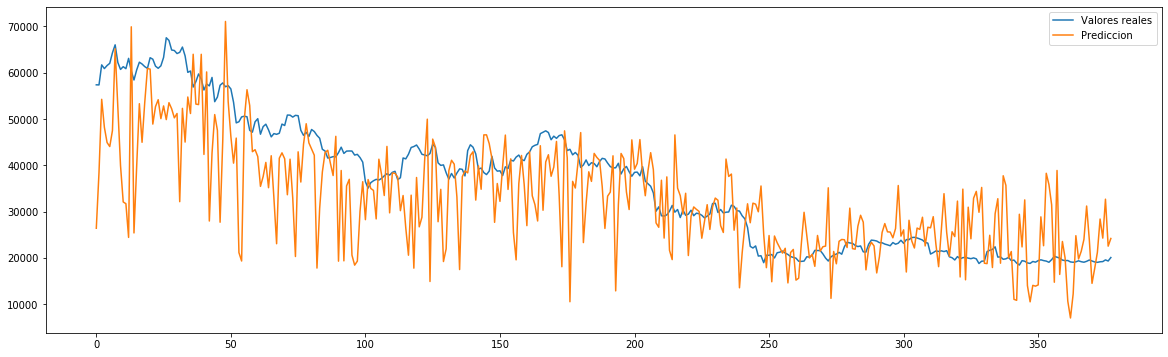

In [67]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [68]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 7875.726303736773
R-cuadrado: 0.4070017127334755
Tasa de acierto de subida: 0.4323607427055703


Modelo 64 neuronas

In [69]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_68 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_69 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_70 (LSTM)              (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [70]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 6s 22ms/step - loss: 15289.9922 - mae: 15289.9922
Epoch 2/100
48/48 [==============================] - 1s 21ms/step - loss: 15143.4199 - mae: 15143.4199
Epoch 3/100
48/48 [==============================] - 1s 21ms/step - loss: 14925.2246 - mae: 14925.2246
Epoch 4/100
48/48 [==============================] - 1s 21ms/step - loss: 14580.7568 - mae: 14580.7568
Epoch 5/100
48/48 [==============================] - 1s 21ms/step - loss: 14273.8467 - mae: 14273.8467
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 13878.0293 - mae: 13878.0293
Epoch 7/100
48/48 [==============================] - 1s 21ms/step - loss: 13664.0381 - mae: 13664.0381
Epoch 8/100
48/48 [==============================] - 1s 21ms/step - loss: 13294.0830 - mae: 13294.0830
Epoch 9/100
48/48 [==============================] - 1s 21ms/step - loss: 12986.9717 - mae: 12986.9717
Epoch 10/100
48/48 [==============================] - 1s 22ms/step - loss

In [71]:
y_predLSTM64 = modelLSTM64.predict(testX1)

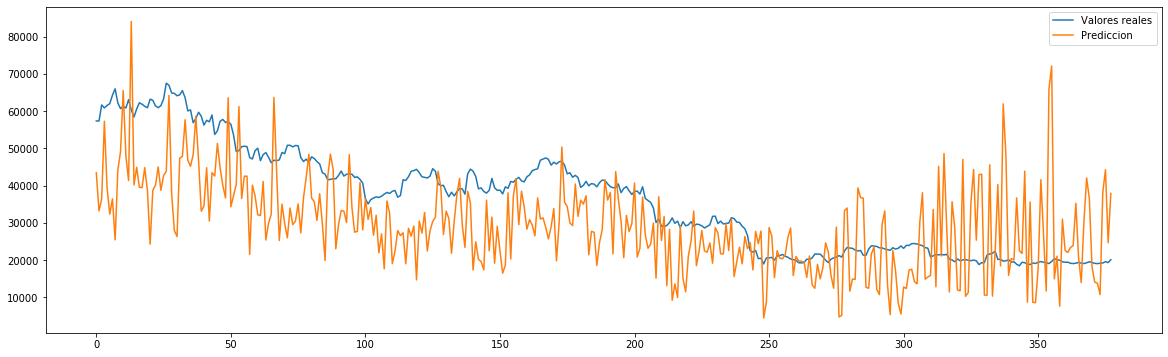

In [72]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [73]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 11858.57404808408
R-cuadrado: -0.0794131087044041
Tasa de acierto de subida: 0.5119363395225465


Modelo 32 neuronas:

In [74]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_72 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_73 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_74 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [75]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 7s 14ms/step - loss: 14828.6787 - mae: 14828.6787
Epoch 2/100
48/48 [==============================] - 1s 15ms/step - loss: 14585.9863 - mae: 14585.9863
Epoch 3/100
48/48 [==============================] - 1s 15ms/step - loss: 14476.3477 - mae: 14476.3477
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 14329.3594 - mae: 14329.3594
Epoch 5/100
48/48 [==============================] - 1s 15ms/step - loss: 14132.0918 - mae: 14132.0918
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 13986.9766 - mae: 13986.9766
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 13851.1201 - mae: 13851.1201
Epoch 8/100
48/48 [==============================] - 1s 15ms/step - loss: 13773.4961 - mae: 13773.4961
Epoch 9/100
48/48 [==============================] - 1s 15ms/step - loss: 13720.4424 - mae: 13720.4424
Epoch 10/100
48/48 [==============================] - 1s 15ms/step - loss

48/48 [==============================] - 1s 15ms/step - loss: 9252.2090 - mae: 9252.2090
Epoch 81/100
48/48 [==============================] - 1s 15ms/step - loss: 9149.7822 - mae: 9149.7822
Epoch 82/100
48/48 [==============================] - 1s 15ms/step - loss: 9138.1016 - mae: 9138.1016
Epoch 83/100
48/48 [==============================] - 1s 14ms/step - loss: 9098.6445 - mae: 9098.6445
Epoch 84/100
48/48 [==============================] - 1s 14ms/step - loss: 9013.9424 - mae: 9013.9424
Epoch 85/100
48/48 [==============================] - 1s 14ms/step - loss: 8990.7275 - mae: 8990.7275
Epoch 86/100
48/48 [==============================] - 1s 14ms/step - loss: 8952.1074 - mae: 8952.1074
Epoch 87/100
48/48 [==============================] - 1s 15ms/step - loss: 8870.0459 - mae: 8870.0459
Epoch 88/100
48/48 [==============================] - 1s 14ms/step - loss: 8777.0244 - mae: 8777.0244
Epoch 89/100
48/48 [==============================] - 1s 14ms/step - loss: 8748.1016 - mae: 874

In [76]:
y_predLSTM32 = modelLSTM32.predict(testX1)

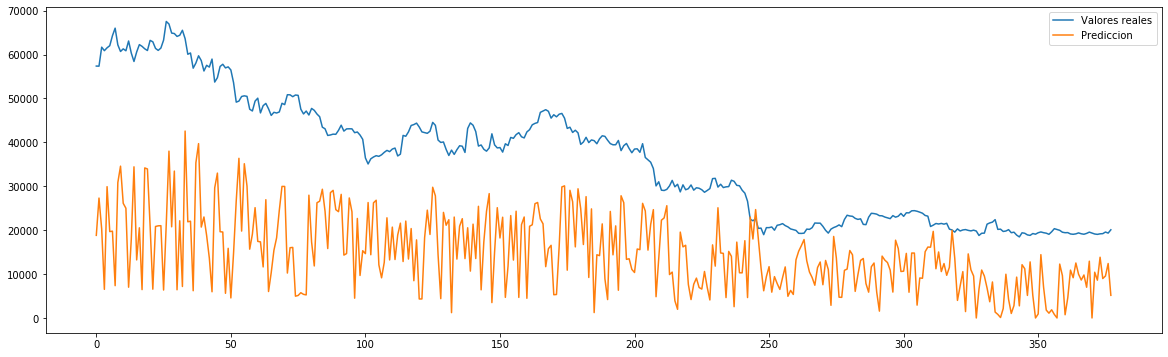

In [77]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [78]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 21259.498241749116
R-cuadrado: -2.076226003290315
Tasa de acierto de subida: 0.4854111405835544


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [79]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_76 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_77 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_78 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_79 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_80 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_81 (LSTM)              (None, 11, 14)          

48/48 [==============================] - 2s 41ms/step - loss: 3568.0464 - mae: 3568.0464
Epoch 65/100
48/48 [==============================] - 2s 40ms/step - loss: 3315.4917 - mae: 3315.4917
Epoch 66/100
48/48 [==============================] - 2s 40ms/step - loss: 3401.9756 - mae: 3401.9756
Epoch 67/100
48/48 [==============================] - 2s 40ms/step - loss: 3513.5505 - mae: 3513.5505
Epoch 68/100
48/48 [==============================] - 2s 39ms/step - loss: 3853.4519 - mae: 3853.4519
Epoch 69/100
48/48 [==============================] - 2s 36ms/step - loss: 4565.7617 - mae: 4565.7617
Epoch 70/100
48/48 [==============================] - 2s 37ms/step - loss: 4808.4131 - mae: 4808.4131
Epoch 71/100
48/48 [==============================] - 2s 38ms/step - loss: 4450.6279 - mae: 4450.6279
Epoch 72/100
48/48 [==============================] - 2s 38ms/step - loss: 4133.6836 - mae: 4133.6836
Epoch 73/100
48/48 [==============================] - 2s 37ms/step - loss: 3620.2129 - mae: 362

In [80]:
y_predLSTM100 = modelLSTM100.predict(testX1)

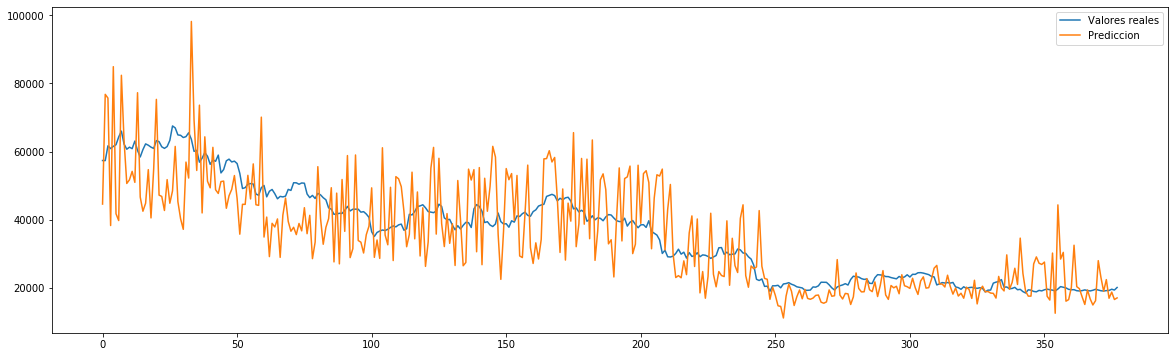

In [81]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [82]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 8143.897576781581
R-cuadrado: 0.45884773927642764
Tasa de acierto de subida: 0.493368700265252


Modelo 64 neuronas:

In [83]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_85 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_86 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_87 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_88 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_89 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_90 (LSTM)              (None, 11, 9)           

In [84]:
y_predLSTM64 = modelLSTM64.predict(testX1)

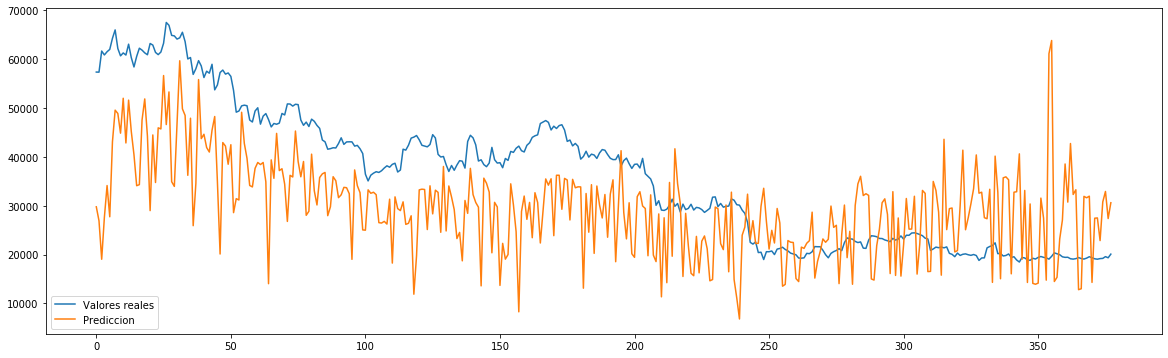

In [85]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [86]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 11453.35125025835
R-cuadrado: 0.02730563597835456
Tasa de acierto de subida: 0.4827586206896552


Modelo 32 neuronas:

In [87]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_94 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_95 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_96 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_97 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_98 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_99 (LSTM)              (None, 11, 5)           

48/48 [==============================] - 2s 32ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 64/100
48/48 [==============================] - 2s 31ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 65/100
48/48 [==============================] - 2s 31ms/step - loss: 15427.3184 - mae: 15427.3184
Epoch 66/100
48/48 [==============================] - 2s 31ms/step - loss: 15427.3223 - mae: 15427.3223
Epoch 67/100
48/48 [==============================] - 2s 32ms/step - loss: 15427.3213 - mae: 15427.3213
Epoch 68/100
48/48 [==============================] - 2s 31ms/step - loss: 15427.3223 - mae: 15427.3223
Epoch 69/100
48/48 [==============================] - 2s 32ms/step - loss: 15427.3223 - mae: 15427.3223
Epoch 70/100
48/48 [==============================] - 1s 29ms/step - loss: 15427.3174 - mae: 15427.3174
Epoch 71/100
48/48 [==============================] - 1s 28ms/step - loss: 15427.3232 - mae: 15427.3232
Epoch 72/100
48/48 [==============================] - 1s 29ms/step - loss: 15

In [88]:
y_predLSTM32 = modelLSTM32.predict(testX1)

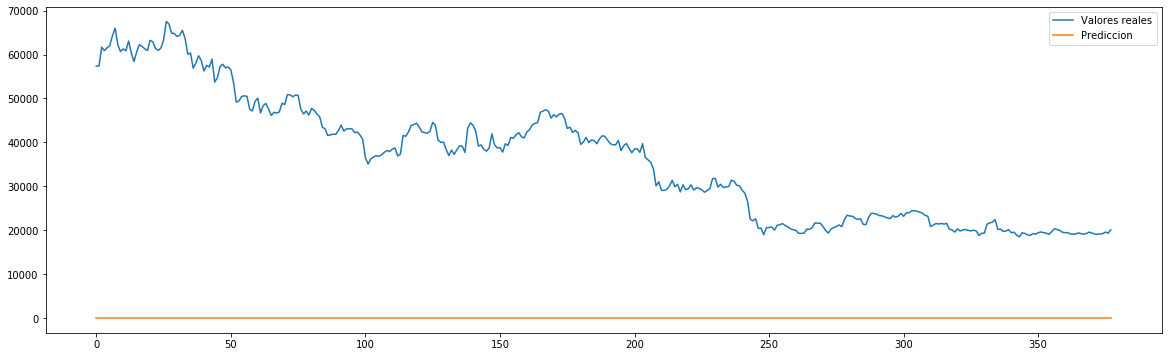

In [89]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [90]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 36038.24775132275
R-cuadrado: -6.664063279599342
Tasa de acierto de subida: 0.53315649867374


# CONJUNTO DE DATOS 2

In [7]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [8]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [9]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [94]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_103 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_104 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_105 (LSTM)             (None, 25)                5900      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [95]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 7s 43ms/step - loss: 14544.4736
Epoch 2/100
46/46 [==============================] - 2s 43ms/step - loss: 10602.1602
Epoch 3/100
46/46 [==============================] - 2s 42ms/step - loss: 9307.1533
Epoch 4/100
46/46 [==============================] - 2s 41ms/step - loss: 7246.4097
Epoch 5/100
46/46 [==============================] - 2s 42ms/step - loss: 7902.1304
Epoch 6/100
46/46 [==============================] - 2s 42ms/step - loss: 8717.4326
Epoch 7/100
46/46 [==============================] - 2s 42ms/step - loss: 7319.2915
Epoch 8/100
46/46 [==============================] - 2s 41ms/step - loss: 8783.6260
Epoch 9/100
46/46 [==============================] - 2s 44ms/step - loss: 9478.1260
Epoch 10/100
46/46 [==============================] - 2s 42ms/step - loss: 8007.4619
Epoch 11/100
46/46 [==============================] - 2s 42ms/step - loss: 7645.2192
Epoch 12/100
46/46 [==============================] - 2s 42ms/step - los

In [96]:
y_predLSTM100 = modelLSTM100.predict(testX2)

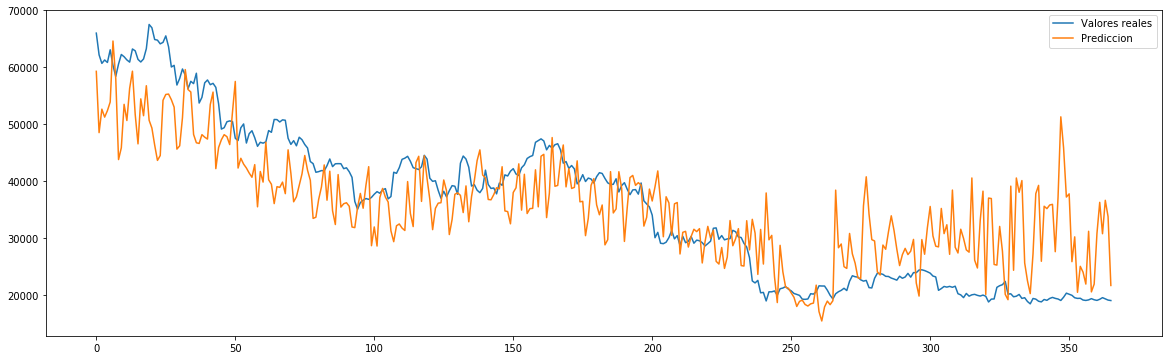

In [97]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [98]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 6554.159907146516
R-cuadrado: 0.6184393105040331
Tasa de acierto de subida: 0.4794520547945205


Modelo 64 neuronas

In [99]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_107 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_108 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_109 (LSTM)             (None, 16)                2432      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [100]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 7s 33ms/step - loss: 13944.0332
Epoch 2/100
46/46 [==============================] - 1s 33ms/step - loss: 13908.2129
Epoch 3/100
46/46 [==============================] - 2s 33ms/step - loss: 11339.2080
Epoch 4/100
46/46 [==============================] - 2s 33ms/step - loss: 10983.8926
Epoch 5/100
46/46 [==============================] - 1s 32ms/step - loss: 10666.4453
Epoch 6/100
46/46 [==============================] - 2s 33ms/step - loss: 12417.3037
Epoch 7/100
46/46 [==============================] - 2s 33ms/step - loss: 11967.9668
Epoch 8/100
46/46 [==============================] - 2s 33ms/step - loss: 10201.5127
Epoch 9/100
46/46 [==============================] - 2s 34ms/step - loss: 9035.1816
Epoch 10/100
46/46 [==============================] - 2s 34ms/step - loss: 11245.8223
Epoch 11/100
46/46 [==============================] - 2s 34ms/step - loss: 9798.8467
Epoch 12/100
46/46 [==============================] - 2s 33ms/ste

46/46 [==============================] - 2s 32ms/step - loss: 9591.1953
Epoch 98/100
46/46 [==============================] - 1s 32ms/step - loss: 8615.8896
Epoch 99/100
46/46 [==============================] - 1s 32ms/step - loss: 7818.1587
Epoch 100/100
12/12 [==============================] - 1s 13ms/step - loss: 26729.5684


In [101]:
y_predLSTM64 = modelLSTM64.predict(testX2)

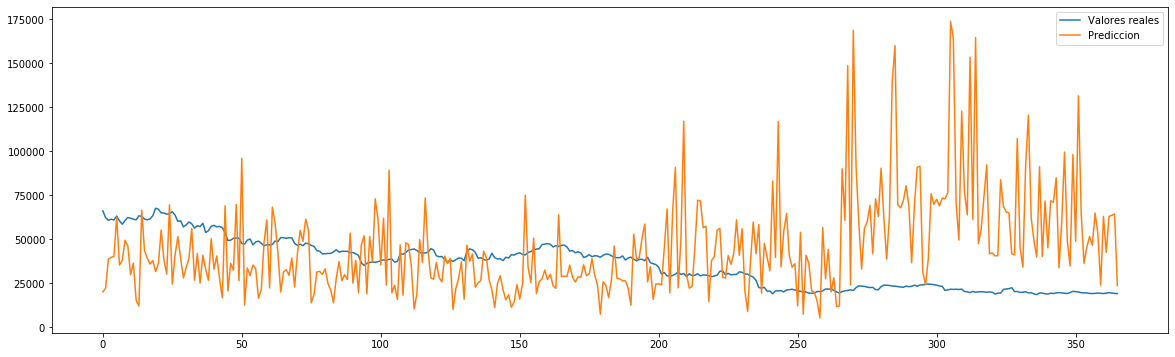

In [102]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [103]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,y_predLSTM64))

Error Absoluto Medio: 26729.56807195611
R-cuadrado: -6.216460142026485
Tasa de acierto de subida: 0.0


Modelo 32 neuronas:

In [104]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_110 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_111 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_112 (LSTM)             (None, 21, 11)            1232      
                                                                 
 lstm_113 (LSTM)             (None, 8)                 640       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [105]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 6s 24ms/step - loss: 9936.4551
Epoch 2/100
46/46 [==============================] - 1s 26ms/step - loss: 9567.1895
Epoch 3/100
46/46 [==============================] - 1s 25ms/step - loss: 5695.5405
Epoch 4/100
46/46 [==============================] - 1s 25ms/step - loss: 6567.4028
Epoch 5/100
46/46 [==============================] - 1s 25ms/step - loss: 8825.0498
Epoch 6/100
46/46 [==============================] - 1s 26ms/step - loss: 6695.4072
Epoch 7/100
46/46 [==============================] - 1s 26ms/step - loss: 7272.7690
Epoch 8/100
46/46 [==============================] - 1s 25ms/step - loss: 6625.1743
Epoch 9/100
46/46 [==============================] - 1s 25ms/step - loss: 6794.1519
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - loss: 6146.8442
Epoch 11/100
46/46 [==============================] - 1s 25ms/step - loss: 5096.3633
Epoch 12/100
46/46 [==============================] - 1s 25ms/step - loss:

In [106]:
y_predLSTM32 = modelLSTM32.predict(testX2)

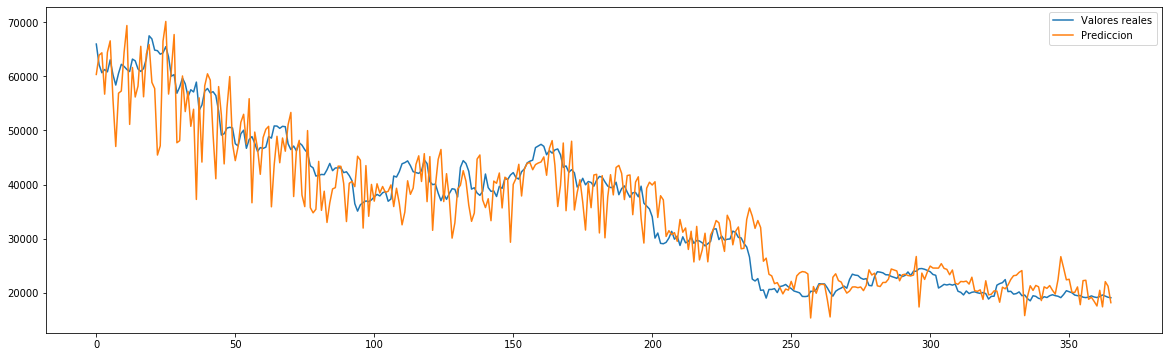

In [107]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [108]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 3554.4294029627736
R-cuadrado: 0.8741976631684278
Tasa de acierto de subida: 0.4849315068493151


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [10]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 21, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 21, 50)            30200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 8s 42ms/step - loss: 12167.6338 - mae: 12167.6338
Epoch 2/100
46/46 [==============================] - 2s 43ms/step - loss: 9349.3564 - mae: 9349.3564
Epoch 3/100
46/46 [==============================] - 2s 48ms/step - loss: 9520.8574 - mae: 9520.8574
Epoch 4/100
46/46 [==============================] - 2s 43ms/step - loss: 8077.7222 - mae: 8077.7222
Epoch 5/100
46/46 [==============================] - 2s 42ms/step - loss: 11292.0293 - mae: 11292.0293
Epoch 6/100
46/46 [==============================] - 2s 42ms/step - loss: 7802.4194 - mae: 7802.4194
Epoch 7/100
46/46 [==============================] - 2s 42ms/step - loss: 7328.1313 - mae: 7328.1313
Epoch 8/100
46/46 [==============================] - 2s 45ms/step - loss: 6915.9297 - mae: 6915.9297
Epoch 9/100
46/46 [==============================] - 2s 43ms/step - loss: 7205.0581 - mae: 7205.0581
Epoch 10/100
46/46 [==============================] - 2s 43ms/step - loss: 8519.4531 - 

In [12]:
y_predLSTM100 = modelLSTM100.predict(testX2)

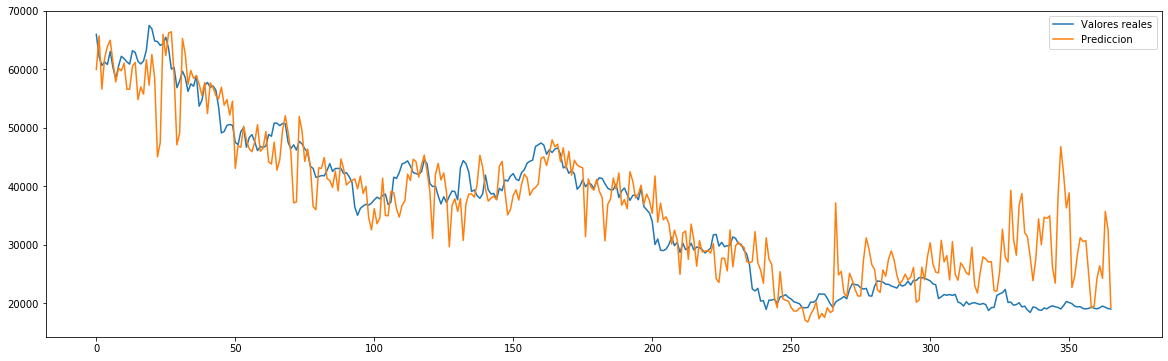

In [13]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [14]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 4157.584020876025
R-cuadrado: 0.8119380173152279
Tasa de acierto de subida: 0.5150684931506849


Modelo 64 neuronas

In [15]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 21, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 21, 64)            33024     
                                                                 
 lstm_6 (LSTM)               (None, 21, 32)            12416     
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [16]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 6s 31ms/step - loss: 15978.0303 - mae: 15978.0303
Epoch 2/100
46/46 [==============================] - 1s 33ms/step - loss: 15671.9482 - mae: 15671.9482
Epoch 3/100
46/46 [==============================] - 1s 32ms/step - loss: 10845.2998 - mae: 10845.2998
Epoch 4/100
46/46 [==============================] - 1s 32ms/step - loss: 7272.4561 - mae: 7272.4561
Epoch 5/100
46/46 [==============================] - 1s 31ms/step - loss: 4556.4097 - mae: 4556.4097
Epoch 6/100
46/46 [==============================] - 1s 31ms/step - loss: 5698.1216 - mae: 5698.1216
Epoch 7/100
46/46 [==============================] - 1s 31ms/step - loss: 5251.7451 - mae: 5251.7451
Epoch 8/100
46/46 [==============================] - 1s 31ms/step - loss: 7064.7520 - mae: 7064.7520
Epoch 9/100
46/46 [==============================] - 1s 31ms/step - loss: 5704.4199 - mae: 5704.4199
Epoch 10/100
46/46 [==============================] - 1s 31ms/step - loss: 6437.0581 

In [17]:
y_predLSTM64 = modelLSTM64.predict(testX2)

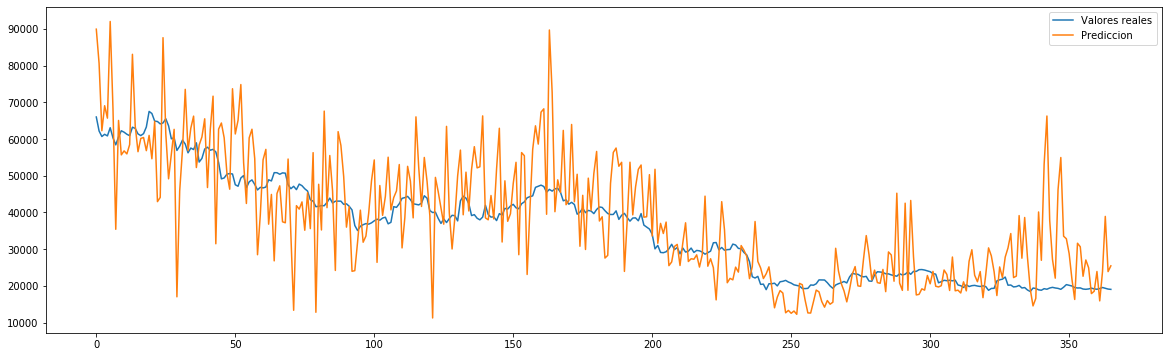

In [18]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [19]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 8457.826574880464
R-cuadrado: 0.29140684165481345
Tasa de acierto de subida: 0.5068493150684932


Modelo 32 neuronas:

In [20]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 21, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 21, 32)            8320      
                                                                 
 lstm_10 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_11 (LSTM)              (None, 16)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [21]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 6s 25ms/step - loss: 8690.0732 - mae: 8690.0732
Epoch 2/100
46/46 [==============================] - 1s 25ms/step - loss: 3855.7844 - mae: 3855.7844
Epoch 3/100
46/46 [==============================] - 1s 25ms/step - loss: 3520.9189 - mae: 3520.9189
Epoch 4/100
46/46 [==============================] - 1s 25ms/step - loss: 4026.6062 - mae: 4026.6062
Epoch 5/100
46/46 [==============================] - 1s 26ms/step - loss: 3138.7815 - mae: 3138.7815
Epoch 6/100
46/46 [==============================] - 1s 26ms/step - loss: 3176.0769 - mae: 3176.0769
Epoch 7/100
46/46 [==============================] - 1s 26ms/step - loss: 2913.9031 - mae: 2913.9031
Epoch 8/100
46/46 [==============================] - 1s 25ms/step - loss: 2851.2854 - mae: 2851.2854
Epoch 9/100
46/46 [==============================] - 1s 25ms/step - loss: 3004.9338 - mae: 3004.9338
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - loss: 6569.3755 - mae:

In [22]:
y_predLSTM32 = modelLSTM32.predict(testX2)

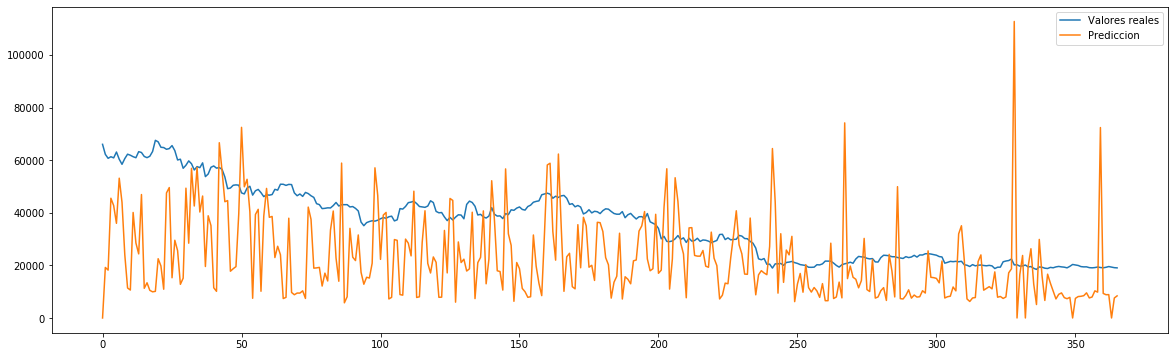

In [23]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [24]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 17338.150192433823
R-cuadrado: -1.5713930767905966
Tasa de acierto de subida: 0.5123287671232877


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [25]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_14 (LSTM)              (None, 21, 33)            11088     
                                                                 
 lstm_15 (LSTM)              (None, 21, 25)            5900      
                                                                 
 lstm_16 (LSTM)              (None, 21, 20)            3680      
                                                                 
 lstm_17 (LSTM)              (None, 21, 17)            2584      
                                                                 
 lstm_18 (LSTM)              (None, 21, 14)           

In [26]:
y_predLSTM100 = modelLSTM100.predict(testX2)

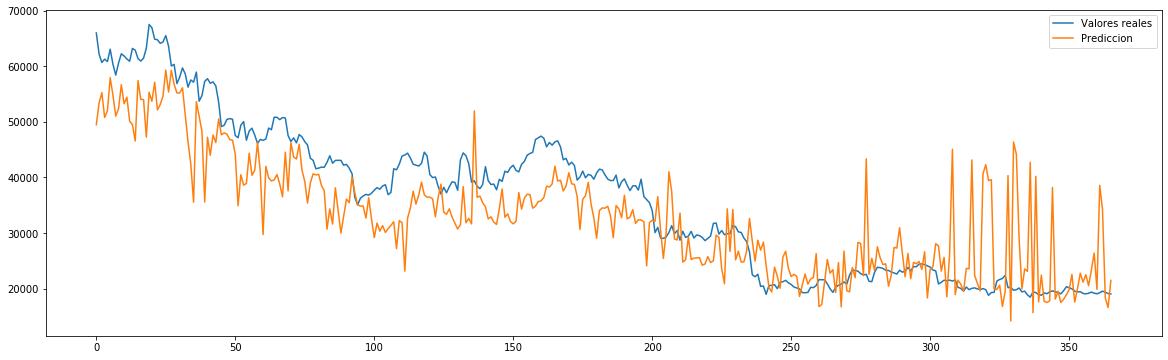

In [27]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [28]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 5994.362046939036
R-cuadrado: 0.6714736706149882
Tasa de acierto de subida: 0.547945205479452


Modelo 64 neuronas:

In [29]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 21, 64)            16896     
                                                                 
 lstm_22 (LSTM)              (None, 21, 32)            12416     
                                                                 
 lstm_23 (LSTM)              (None, 21, 21)            4536      
                                                                 
 lstm_24 (LSTM)              (None, 21, 16)            2432      
                                                                 
 lstm_25 (LSTM)              (None, 21, 13)            1560      
                                                                 
 lstm_26 (LSTM)              (None, 21, 11)            1100      
                                                                 
 lstm_27 (LSTM)              (None, 21, 9)            

In [30]:
y_predLSTM64 = modelLSTM64.predict(testX2)

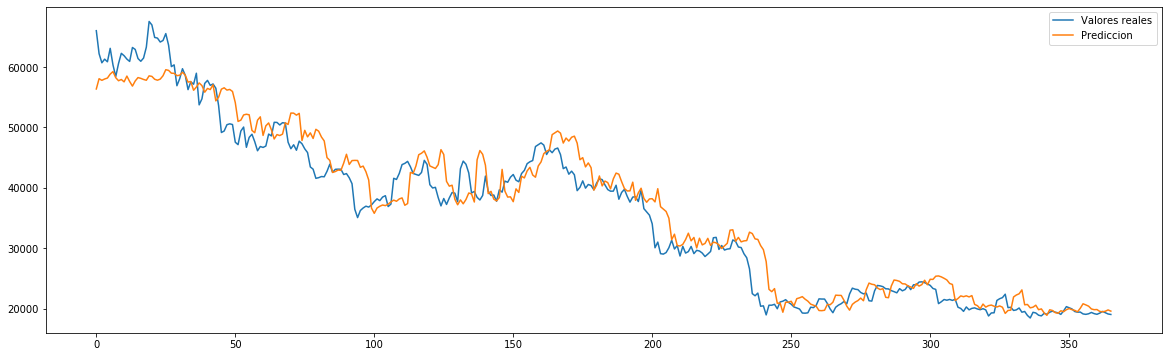

In [31]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [32]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 2552.716416922814
R-cuadrado: 0.935011320833689
Tasa de acierto de subida: 0.5260273972602739


Modelo 32 neuronas:

In [34]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 21, 32)            4352      
                                                                 
 lstm_40 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_41 (LSTM)              (None, 21, 11)            1232      
                                                                 
 lstm_42 (LSTM)              (None, 21, 8)             640       
                                                                 
 lstm_43 (LSTM)              (None, 21, 6)             360       
                                                                 
 lstm_44 (LSTM)              (None, 21, 5)             240       
                                                                 
 lstm_45 (LSTM)              (None, 21, 5)            

In [35]:
y_predLSTM32 = modelLSTM32.predict(testX2)

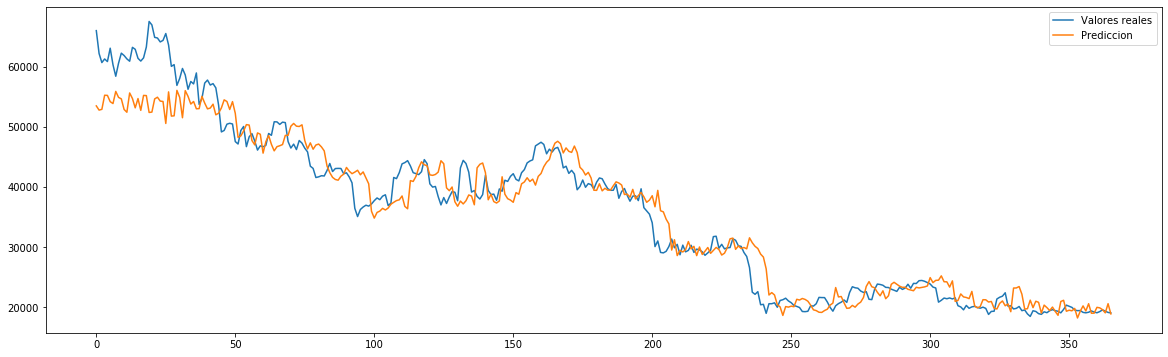

In [36]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [37]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 2692.542816128757
R-cuadrado: 0.922678414780285
Tasa de acierto de subida: 0.4575342465753425


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [38]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_49 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_50 (LSTM)              (None, 21, 33)            11088     
                                                                 
 lstm_51 (LSTM)              (None, 25)                5900      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [39]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 8s 34ms/step - loss: 14383.5479
Epoch 2/100
46/46 [==============================] - 2s 34ms/step - loss: 12353.0381
Epoch 3/100
46/46 [==============================] - 2s 35ms/step - loss: 12443.6270
Epoch 4/100
46/46 [==============================] - 2s 34ms/step - loss: 11185.7285
Epoch 5/100
46/46 [==============================] - 2s 34ms/step - loss: 9003.8721
Epoch 6/100
46/46 [==============================] - 2s 36ms/step - loss: 9065.4375
Epoch 7/100
46/46 [==============================] - 2s 35ms/step - loss: 8522.7471
Epoch 8/100
46/46 [==============================] - 2s 36ms/step - loss: 8798.9492
Epoch 9/100
46/46 [==============================] - 2s 36ms/step - loss: 9536.5908
Epoch 10/100
46/46 [==============================] - 2s 34ms/step - loss: 9675.0713
Epoch 11/100
46/46 [==============================] - 2s 35ms/step - loss: 9710.3555
Epoch 12/100
46/46 [==============================] - 2s 37ms/step - l

Epoch 97/100
46/46 [==============================] - 2s 34ms/step - loss: 9037.8320
Epoch 98/100
46/46 [==============================] - 2s 35ms/step - loss: 9222.8867
Epoch 99/100
46/46 [==============================] - 2s 34ms/step - loss: 9135.1826
Epoch 100/100
12/12 [==============================] - 1s 13ms/step - loss: 20999.9043


In [40]:
y_predLSTM100 = modelLSTM100.predict(testX2)

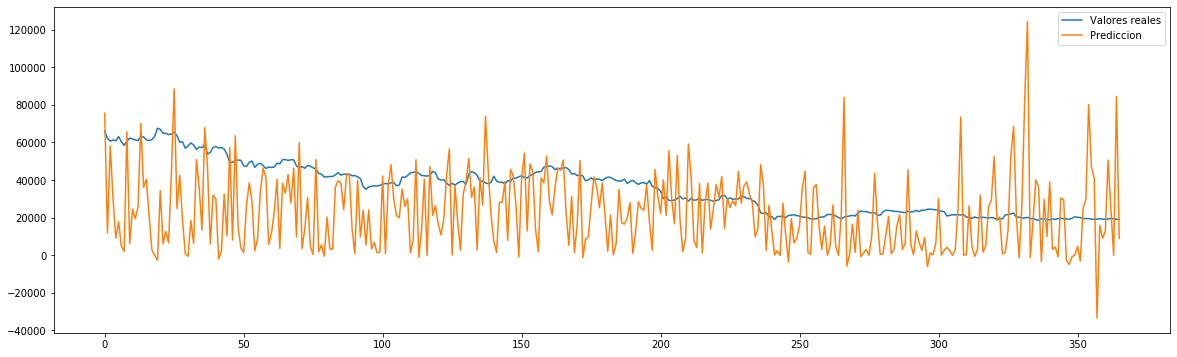

In [41]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [42]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 20999.902459105608
R-cuadrado: -2.756428821386089
Tasa de acierto de subida: 0.4849315068493151


Modelo 64 neuronas

In [43]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 21, 64)            16896     
                                                                 
 lstm_53 (LSTM)              (None, 21, 32)            12416     
                                                                 
 lstm_54 (LSTM)              (None, 21, 21)            4536      
                                                                 
 lstm_55 (LSTM)              (None, 16)                2432      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [44]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 6s 28ms/step - loss: 16210.7324
Epoch 2/100
46/46 [==============================] - 1s 28ms/step - loss: 16277.0850
Epoch 3/100
46/46 [==============================] - 1s 29ms/step - loss: 16166.6787
Epoch 4/100
46/46 [==============================] - 1s 28ms/step - loss: 16047.5693
Epoch 5/100
46/46 [==============================] - 1s 28ms/step - loss: 16073.0371
Epoch 6/100
46/46 [==============================] - 1s 28ms/step - loss: 16226.9258
Epoch 7/100
46/46 [==============================] - 1s 28ms/step - loss: 16133.7910
Epoch 8/100
46/46 [==============================] - 1s 28ms/step - loss: 16065.8779
Epoch 9/100
46/46 [==============================] - 1s 28ms/step - loss: 16031.9170
Epoch 10/100
46/46 [==============================] - 1s 28ms/step - loss: 16005.7441
Epoch 11/100
46/46 [==============================] - 1s 28ms/step - loss: 16132.1270
Epoch 12/100
46/46 [==============================] - 1s 28ms/s

In [45]:
y_predLSTM64 = modelLSTM64.predict(testX2)

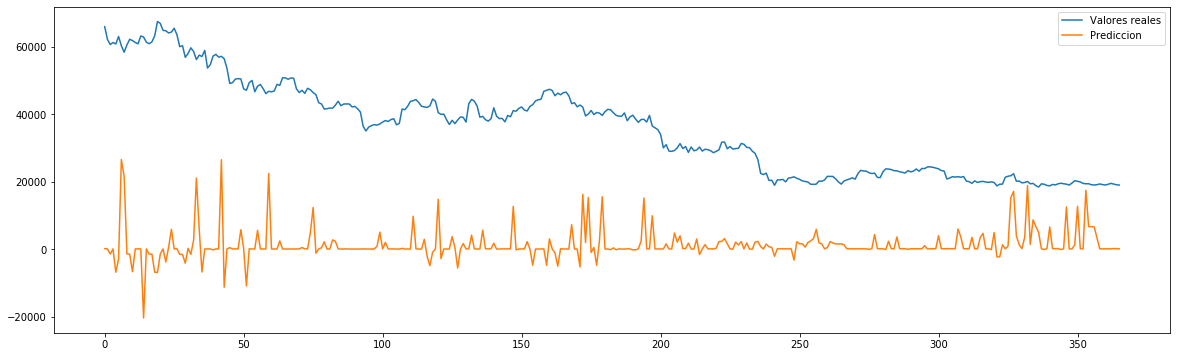

In [46]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [47]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 34475.43036827767
R-cuadrado: -6.588965575286541
Tasa de acierto de subida: 0.5260273972602739


Modelo 32 neuronas:

In [48]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 21, 32)            4352      
                                                                 
 lstm_57 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_58 (LSTM)              (None, 21, 11)            1232      
                                                                 
 lstm_59 (LSTM)              (None, 8)                 640       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [49]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 6s 24ms/step - loss: 16155.8799
Epoch 2/100
46/46 [==============================] - 1s 24ms/step - loss: 16051.7666
Epoch 3/100
46/46 [==============================] - 1s 24ms/step - loss: 16040.4551
Epoch 4/100
46/46 [==============================] - 1s 24ms/step - loss: 16059.6445
Epoch 5/100
46/46 [==============================] - 1s 24ms/step - loss: 16171.8662
Epoch 6/100
46/46 [==============================] - 1s 24ms/step - loss: 16115.6084
Epoch 7/100
46/46 [==============================] - 1s 24ms/step - loss: 16056.1807
Epoch 8/100
46/46 [==============================] - 1s 24ms/step - loss: 16003.3916
Epoch 9/100
46/46 [==============================] - 1s 24ms/step - loss: 15941.4453
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - loss: 15956.8906
Epoch 11/100
46/46 [==============================] - 1s 25ms/step - loss: 15936.6758
Epoch 12/100
46/46 [==============================] - 1s 24ms/s

In [50]:
y_predLSTM32 = modelLSTM32.predict(testX2)

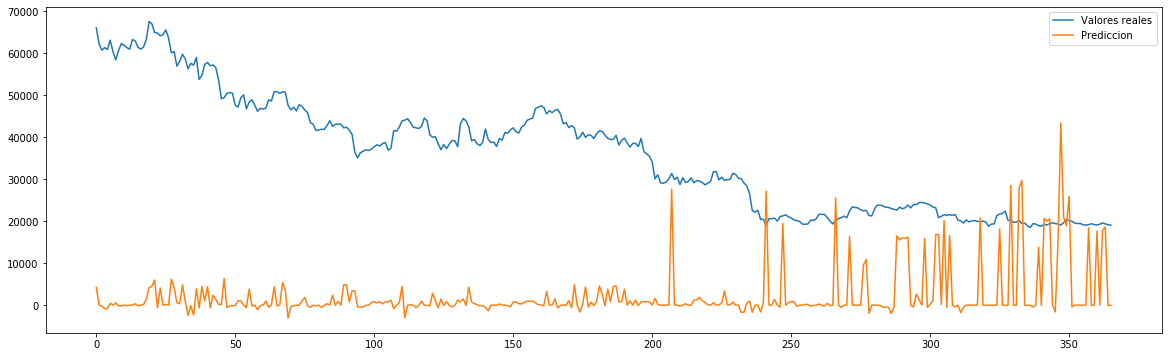

In [51]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [52]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 33846.722363715686
R-cuadrado: -6.46790748040633
Tasa de acierto de subida: 0.5068493150684932


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [53]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_61 (LSTM)              (None, 21, 100)           80400     
                                                                 
 lstm_62 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_63 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [54]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 7s 43ms/step - loss: 15725.7490 - mae: 15725.7490
Epoch 2/100
46/46 [==============================] - 2s 43ms/step - loss: 15110.2676 - mae: 15110.2676
Epoch 3/100
46/46 [==============================] - 2s 43ms/step - loss: 13804.2979 - mae: 13804.2979
Epoch 4/100
46/46 [==============================] - 2s 43ms/step - loss: 13733.2510 - mae: 13733.2510
Epoch 5/100
46/46 [==============================] - 2s 43ms/step - loss: 13787.6445 - mae: 13787.6445
Epoch 6/100
46/46 [==============================] - 2s 43ms/step - loss: 13686.6475 - mae: 13686.6475
Epoch 7/100
46/46 [==============================] - 2s 43ms/step - loss: 13880.1807 - mae: 13880.1807
Epoch 8/100
46/46 [==============================] - 2s 43ms/step - loss: 13577.7803 - mae: 13577.7803
Epoch 9/100
46/46 [==============================] - 2s 43ms/step - loss: 13071.1943 - mae: 13071.1943
Epoch 10/100
46/46 [==============================] - 2s 43ms/step - loss

Epoch 81/100
46/46 [==============================] - 2s 46ms/step - loss: 9754.3760 - mae: 9754.3760
Epoch 82/100
46/46 [==============================] - 2s 47ms/step - loss: 9757.5400 - mae: 9757.5400
Epoch 83/100
46/46 [==============================] - 2s 46ms/step - loss: 9682.8789 - mae: 9682.8789
Epoch 84/100
46/46 [==============================] - 2s 46ms/step - loss: 9930.7881 - mae: 9930.7881
Epoch 85/100
46/46 [==============================] - 2s 46ms/step - loss: 9923.3623 - mae: 9923.3623
Epoch 86/100
46/46 [==============================] - 2s 46ms/step - loss: 9948.3389 - mae: 9948.3389
Epoch 87/100
46/46 [==============================] - 2s 46ms/step - loss: 9750.4502 - mae: 9750.4502
Epoch 88/100
46/46 [==============================] - 2s 46ms/step - loss: 9773.1084 - mae: 9773.1084
Epoch 89/100
46/46 [==============================] - 2s 46ms/step - loss: 9591.7324 - mae: 9591.7324
Epoch 90/100
46/46 [==============================] - 2s 47ms/step - loss: 9569.88

In [55]:
y_predLSTM100 = modelLSTM100.predict(testX2)

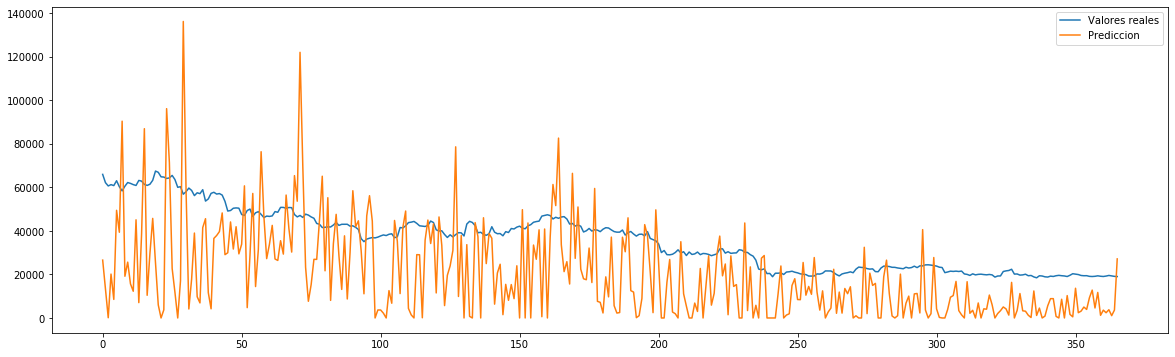

In [56]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [57]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 20225.392201720588
R-cuadrado: -2.240569199212681
Tasa de acierto de subida: 0.5068493150684932


Modelo 64 neuronas

In [58]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 21, 64)            16896     
                                                                 
 lstm_65 (LSTM)              (None, 21, 64)            33024     
                                                                 
 lstm_66 (LSTM)              (None, 21, 32)            12416     
                                                                 
 lstm_67 (LSTM)              (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [59]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 7s 31ms/step - loss: 15176.1016 - mae: 15176.1016
Epoch 2/100
46/46 [==============================] - 1s 31ms/step - loss: 14315.7852 - mae: 14315.7852
Epoch 3/100
46/46 [==============================] - 1s 31ms/step - loss: 14141.2031 - mae: 14141.2031
Epoch 4/100
46/46 [==============================] - 1s 32ms/step - loss: 14450.2402 - mae: 14450.2402
Epoch 5/100
46/46 [==============================] - 1s 32ms/step - loss: 14578.4766 - mae: 14578.4766
Epoch 6/100
46/46 [==============================] - 1s 31ms/step - loss: 14414.6963 - mae: 14414.6963
Epoch 7/100
46/46 [==============================] - 1s 32ms/step - loss: 14409.4736 - mae: 14409.4736
Epoch 8/100
46/46 [==============================] - 1s 32ms/step - loss: 14761.9463 - mae: 14761.9463
Epoch 9/100
46/46 [==============================] - 1s 31ms/step - loss: 14619.3047 - mae: 14619.3047
Epoch 10/100
46/46 [==============================] - 1s 31ms/step - loss

In [60]:
y_predLSTM64 = modelLSTM64.predict(testX2)

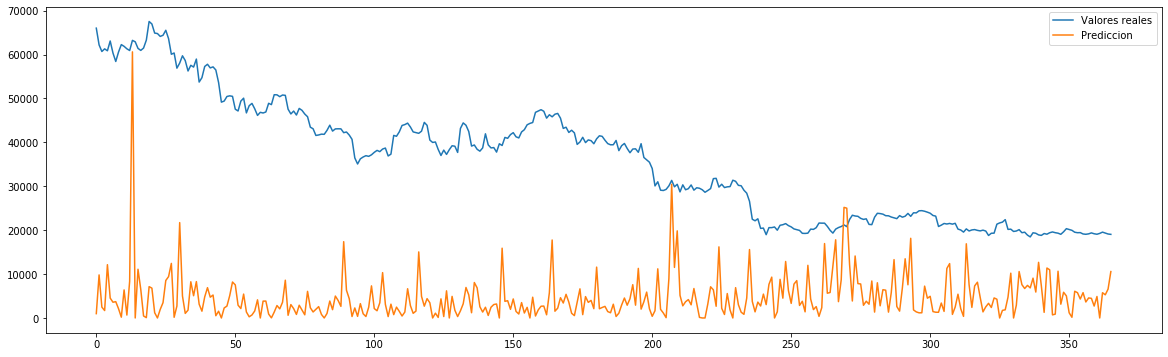

In [61]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [62]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 31145.162744765155
R-cuadrado: -5.426215544557167
Tasa de acierto de subida: 0.536986301369863


Modelo 32 neuronas:

In [63]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 21, 32)            4352      
                                                                 
 lstm_69 (LSTM)              (None, 21, 32)            8320      
                                                                 
 lstm_70 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_71 (LSTM)              (None, 16)                2112      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [64]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 8s 25ms/step - loss: 16039.4805 - mae: 16039.4805
Epoch 2/100
46/46 [==============================] - 1s 25ms/step - loss: 16034.5234 - mae: 16034.5234
Epoch 3/100
46/46 [==============================] - 1s 25ms/step - loss: 16034.5576 - mae: 16034.5576
Epoch 4/100
46/46 [==============================] - 1s 26ms/step - loss: 16032.2100 - mae: 16032.2100
Epoch 5/100
46/46 [==============================] - 1s 26ms/step - loss: 16028.0420 - mae: 16028.0420
Epoch 6/100
46/46 [==============================] - 1s 23ms/step - loss: 16025.4482 - mae: 16025.4482
Epoch 7/100
46/46 [==============================] - 1s 25ms/step - loss: 16021.4736 - mae: 16021.4736
Epoch 8/100
46/46 [==============================] - 1s 25ms/step - loss: 16021.3623 - mae: 16021.3623
Epoch 9/100
46/46 [==============================] - 1s 25ms/step - loss: 16012.3721 - mae: 16012.3721
Epoch 10/100
46/46 [==============================] - 1s 26ms/step - loss

In [65]:
y_predLSTM32 = modelLSTM32.predict(testX2)

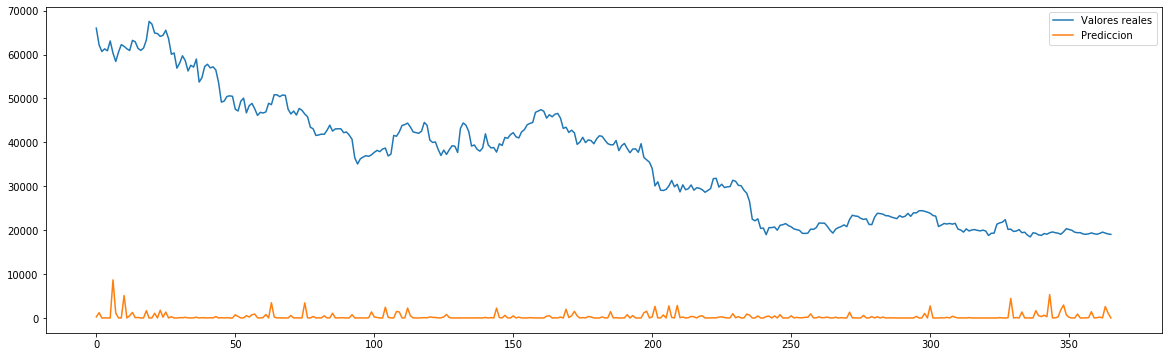

In [66]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [67]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 35453.102851688855
R-cuadrado: -6.764802185303205
Tasa de acierto de subida: 0.4876712328767123


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [68]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_73 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_74 (LSTM)              (None, 21, 33)            11088     
                                                                 
 lstm_75 (LSTM)              (None, 21, 25)            5900      
                                                                 
 lstm_76 (LSTM)              (None, 21, 20)            3680      
                                                                 
 lstm_77 (LSTM)              (None, 21, 17)            2584      
                                                                 
 lstm_78 (LSTM)              (None, 21, 14)          

46/46 [==============================] - 4s 78ms/step - loss: 15974.5146 - mae: 15974.5146
Epoch 64/100
46/46 [==============================] - 3s 76ms/step - loss: 15975.6348 - mae: 15975.6348
Epoch 65/100
46/46 [==============================] - 4s 77ms/step - loss: 15972.5146 - mae: 15972.5146
Epoch 66/100
46/46 [==============================] - 3s 72ms/step - loss: 15970.6748 - mae: 15970.6748
Epoch 67/100
46/46 [==============================] - 3s 65ms/step - loss: 15959.8350 - mae: 15959.8350
Epoch 68/100
46/46 [==============================] - 3s 66ms/step - loss: 15952.1367 - mae: 15952.1367
Epoch 69/100
46/46 [==============================] - 3s 65ms/step - loss: 15950.9258 - mae: 15950.9258
Epoch 70/100
46/46 [==============================] - 3s 63ms/step - loss: 15941.7051 - mae: 15941.7051
Epoch 71/100
46/46 [==============================] - 3s 62ms/step - loss: 15930.2354 - mae: 15930.2354
Epoch 72/100
46/46 [==============================] - 3s 62ms/step - loss: 15

In [69]:
y_predLSTM100 = modelLSTM100.predict(testX2)

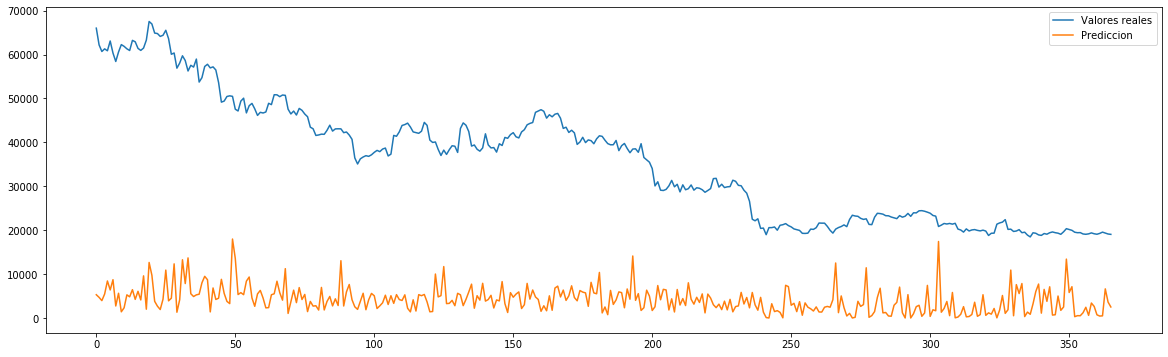

In [70]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [71]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 31628.934018715616
R-cuadrado: -5.271390510907904
Tasa de acierto de subida: 0.4986301369863014


Modelo 64 neuronas:

In [72]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 21, 64)            16896     
                                                                 
 lstm_82 (LSTM)              (None, 21, 32)            12416     
                                                                 
 lstm_83 (LSTM)              (None, 21, 21)            4536      
                                                                 
 lstm_84 (LSTM)              (None, 21, 16)            2432      
                                                                 
 lstm_85 (LSTM)              (None, 21, 13)            1560      
                                                                 
 lstm_86 (LSTM)              (None, 21, 11)            1100      
                                                                 
 lstm_87 (LSTM)              (None, 21, 9)           

In [74]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)

Epoch 1/100
46/46 [==============================] - 4s 81ms/step - loss: 11570.3311 - mae: 11570.3311
Epoch 2/100
46/46 [==============================] - 4s 79ms/step - loss: 11642.1279 - mae: 11642.1279
Epoch 3/100
46/46 [==============================] - 4s 76ms/step - loss: 11662.9375 - mae: 11662.9375
Epoch 4/100
46/46 [==============================] - 4s 78ms/step - loss: 11553.8848 - mae: 11553.8848
Epoch 5/100
46/46 [==============================] - 3s 72ms/step - loss: 11549.4453 - mae: 11549.4453
Epoch 6/100
46/46 [==============================] - 3s 74ms/step - loss: 11678.6309 - mae: 11678.6309
Epoch 7/100
46/46 [==============================] - 4s 82ms/step - loss: 11078.9590 - mae: 11078.9590
Epoch 8/100
46/46 [==============================] - 4s 80ms/step - loss: 10545.5908 - mae: 10545.5908
Epoch 9/100
46/46 [==============================] - 4s 78ms/step - loss: 10475.4033 - mae: 10475.4033
Epoch 10/100
46/46 [==============================] - 3s 70ms/step - loss

In [75]:
y_predLSTM64 = modelLSTM64.predict(testX2)

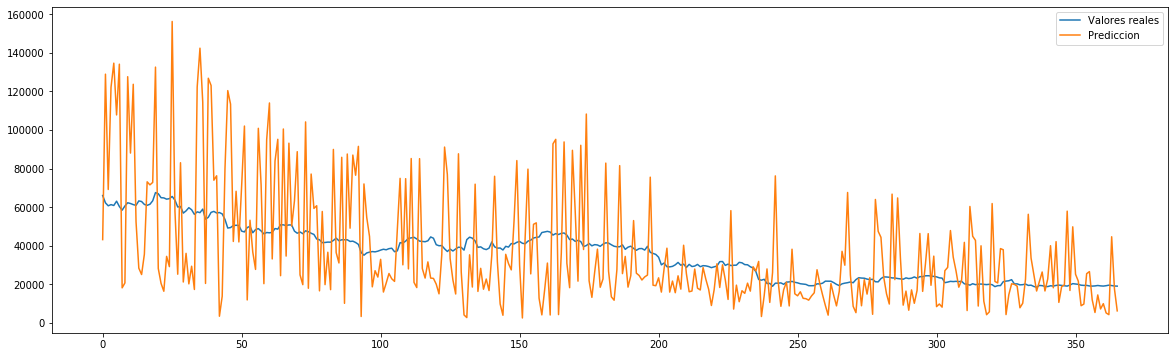

In [76]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [77]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 20885.79808487022
R-cuadrado: -2.968122440114279
Tasa de acierto de subida: 0.5726027397260274


Modelo 32 neuronas:

In [78]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 21, 32)            4352      
                                                                 
 lstm_91 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_92 (LSTM)              (None, 21, 11)            1232      
                                                                 
 lstm_93 (LSTM)              (None, 21, 8)             640       
                                                                 
 lstm_94 (LSTM)              (None, 21, 6)             360       
                                                                 
 lstm_95 (LSTM)              (None, 21, 5)             240       
                                                                 
 lstm_96 (LSTM)              (None, 21, 5)           

In [79]:
y_predLSTM32 = modelLSTM32.predict(testX2)

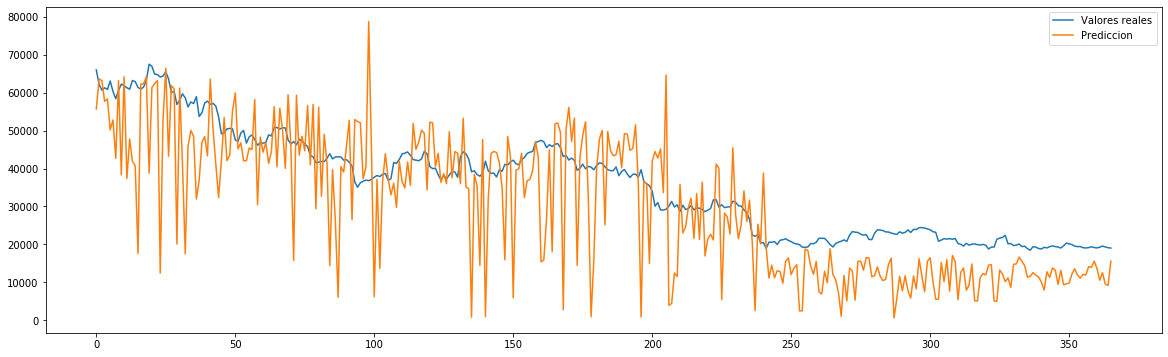

In [80]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [81]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 9957.820961060237
R-cuadrado: 0.06310135230856273
Tasa de acierto de subida: 0.5041095890410959


# CONJUNTO DE DATOS 3

In [82]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [83]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [84]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [85]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_99 (LSTM)              (None, 35, 100)           40800     
                                                                 
 lstm_100 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_101 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_102 (LSTM)             (None, 25)                5900      
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [86]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 10s 55ms/step - loss: 17749.5449
Epoch 2/100
46/46 [==============================] - 3s 65ms/step - loss: 15265.4346
Epoch 3/100
46/46 [==============================] - 3s 64ms/step - loss: 14882.3252
Epoch 4/100
46/46 [==============================] - 3s 58ms/step - loss: 13635.6104
Epoch 5/100
46/46 [==============================] - 3s 63ms/step - loss: 13521.5557
Epoch 6/100
46/46 [==============================] - 3s 58ms/step - loss: 22884.3906
Epoch 7/100
46/46 [==============================] - 3s 57ms/step - loss: 18288.5293
Epoch 8/100
46/46 [==============================] - 3s 65ms/step - loss: 9883.1943
Epoch 9/100
46/46 [==============================] - 3s 66ms/step - loss: 7804.5713
Epoch 10/100
46/46 [==============================] - 3s 59ms/step - loss: 7029.1387
Epoch 11/100
46/46 [==============================] - 3s 60ms/step - loss: 5894.6494
Epoch 12/100
46/46 [==============================] - 3s 62ms/step

In [87]:
y_predLSTM100 = modelLSTM100.predict(testX3)

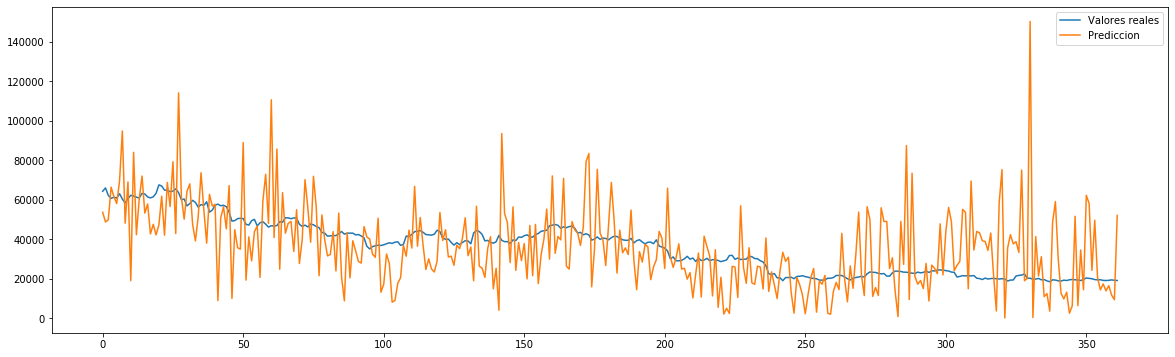

In [88]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [89]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 14034.472956498288
R-cuadrado: -0.9924281868215379
Tasa de acierto de subida: 0.5235457063711911


Modelo 64 neuronas

In [90]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_103 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_104 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_105 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_106 (LSTM)             (None, 16)                2432      
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [91]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 14s 59ms/step - loss: 17408.3457
Epoch 2/100
46/46 [==============================] - 3s 57ms/step - loss: 16223.3574
Epoch 3/100
46/46 [==============================] - 2s 49ms/step - loss: 15649.3213
Epoch 4/100
46/46 [==============================] - 3s 59ms/step - loss: 15392.9492
Epoch 5/100
46/46 [==============================] - 3s 57ms/step - loss: 13473.2578
Epoch 6/100
46/46 [==============================] - 2s 50ms/step - loss: 11435.0254
Epoch 7/100
46/46 [==============================] - 3s 59ms/step - loss: 13100.9629
Epoch 8/100
46/46 [==============================] - 3s 67ms/step - loss: 14135.2822
Epoch 9/100
46/46 [==============================] - 3s 68ms/step - loss: 26636.0977
Epoch 10/100
46/46 [==============================] - 3s 65ms/step - loss: 6107.6558
Epoch 11/100
46/46 [==============================] - 3s 63ms/step - loss: 15192.3652
Epoch 12/100
46/46 [==============================] - 3s 61ms/s

Epoch 97/100
46/46 [==============================] - 3s 64ms/step - loss: 10778.3037
Epoch 98/100
46/46 [==============================] - 3s 65ms/step - loss: 10202.9912
Epoch 99/100
46/46 [==============================] - 3s 55ms/step - loss: 7612.5464
Epoch 100/100
12/12 [==============================] - 3s 18ms/step - loss: 17581.3789


In [92]:
y_predLSTM64 = modelLSTM64.predict(testX3)

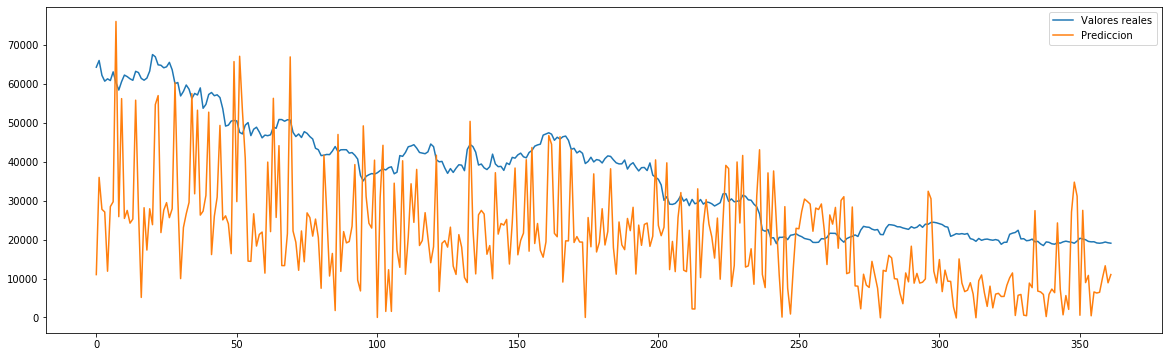

In [93]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [94]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,y_predLSTM64))

Error Absoluto Medio: 17581.37878506523
R-cuadrado: -1.2781167689449955
Tasa de acierto de subida: 0.0


Modelo 32 neuronas:

In [95]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_107 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_108 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_109 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_110 (LSTM)             (None, 8)                 640       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [96]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 14s 48ms/step - loss: 19768.1621
Epoch 2/100
46/46 [==============================] - 2s 42ms/step - loss: 17086.1113
Epoch 3/100
46/46 [==============================] - 2s 38ms/step - loss: 16169.5127
Epoch 4/100
46/46 [==============================] - 2s 41ms/step - loss: 16138.7822
Epoch 5/100
46/46 [==============================] - 2s 53ms/step - loss: 16375.4824
Epoch 6/100
46/46 [==============================] - 2s 54ms/step - loss: 16106.2520
Epoch 7/100
46/46 [==============================] - 2s 52ms/step - loss: 16082.4824
Epoch 8/100
46/46 [==============================] - 2s 51ms/step - loss: 15961.4043
Epoch 9/100
46/46 [==============================] - 2s 54ms/step - loss: 15786.9082
Epoch 10/100
46/46 [==============================] - 2s 54ms/step - loss: 15570.0967
Epoch 11/100
46/46 [==============================] - 3s 56ms/step - loss: 14765.3701
Epoch 12/100
46/46 [==============================] - 2s 49ms/

In [97]:
y_predLSTM32 = modelLSTM32.predict(testX3)

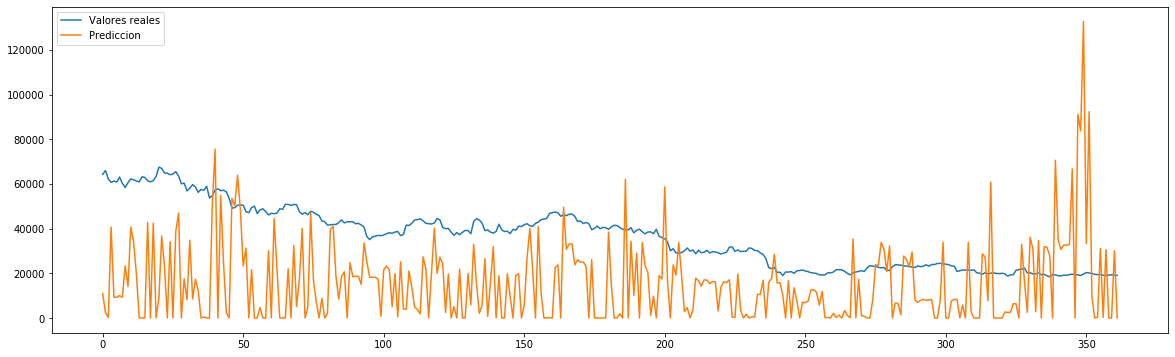

In [98]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [99]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 25287.84302662565
R-cuadrado: -3.8685958473330455
Tasa de acierto de subida: 0.4986149584487535


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [100]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_111 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_112 (LSTM)             (None, 35, 100)           80400     
                                                                 
 lstm_113 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_114 (LSTM)             (None, 50)                20200     
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [101]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 11s 69ms/step - loss: 15320.6270 - mae: 15320.6270
Epoch 2/100
46/46 [==============================] - 3s 70ms/step - loss: 17193.5820 - mae: 17193.5820
Epoch 3/100
46/46 [==============================] - 3s 75ms/step - loss: 15478.9990 - mae: 15478.9990
Epoch 4/100
46/46 [==============================] - 3s 69ms/step - loss: 14115.2383 - mae: 14115.2383
Epoch 5/100
46/46 [==============================] - 3s 68ms/step - loss: 15552.0537 - mae: 15552.0537
Epoch 6/100
46/46 [==============================] - 3s 69ms/step - loss: 13395.5225 - mae: 13395.5225
Epoch 7/100
46/46 [==============================] - 3s 70ms/step - loss: 13517.3467 - mae: 13517.3467
Epoch 8/100
46/46 [==============================] - 3s 69ms/step - loss: 24272.8066 - mae: 24272.8066
Epoch 9/100
46/46 [==============================] - 3s 69ms/step - loss: 15940.2705 - mae: 15940.2705
Epoch 10/100
46/46 [==============================] - 3s 69ms/step - los

In [102]:
y_predLSTM100 = modelLSTM100.predict(testX3)

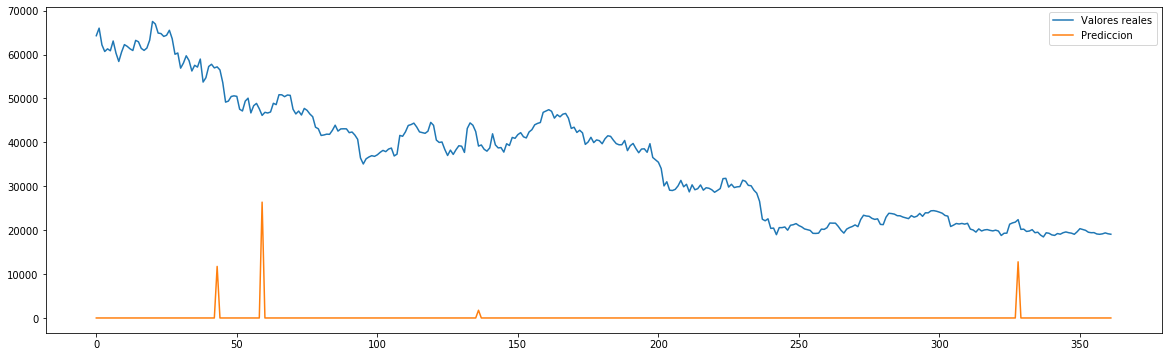

In [103]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [104]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35953.96644490784
R-cuadrado: -6.949667622313929
Tasa de acierto de subida: 0.5401662049861495


Modelo 64 neuronas

In [105]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_115 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_116 (LSTM)             (None, 35, 64)            33024     
                                                                 
 lstm_117 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_118 (LSTM)             (None, 32)                8320      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [106]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 51ms/step - loss: 13395.9639 - mae: 13395.9639
Epoch 2/100
46/46 [==============================] - 2s 50ms/step - loss: 15290.6445 - mae: 15290.6445
Epoch 3/100
46/46 [==============================] - 2s 51ms/step - loss: 16272.4502 - mae: 16272.4502
Epoch 4/100
46/46 [==============================] - 2s 50ms/step - loss: 13535.3945 - mae: 13535.3945
Epoch 5/100
46/46 [==============================] - 2s 52ms/step - loss: 13414.8350 - mae: 13414.8350
Epoch 6/100
46/46 [==============================] - 2s 51ms/step - loss: 16167.4668 - mae: 16167.4668
Epoch 7/100
46/46 [==============================] - 2s 50ms/step - loss: 13419.5322 - mae: 13419.5322
Epoch 8/100
46/46 [==============================] - 2s 50ms/step - loss: 13114.4268 - mae: 13114.4268
Epoch 9/100
46/46 [==============================] - 2s 50ms/step - loss: 12315.7422 - mae: 12315.7422
Epoch 10/100
46/46 [==============================] - 2s 51ms/step - loss

In [107]:
y_predLSTM64 = modelLSTM64.predict(testX3)

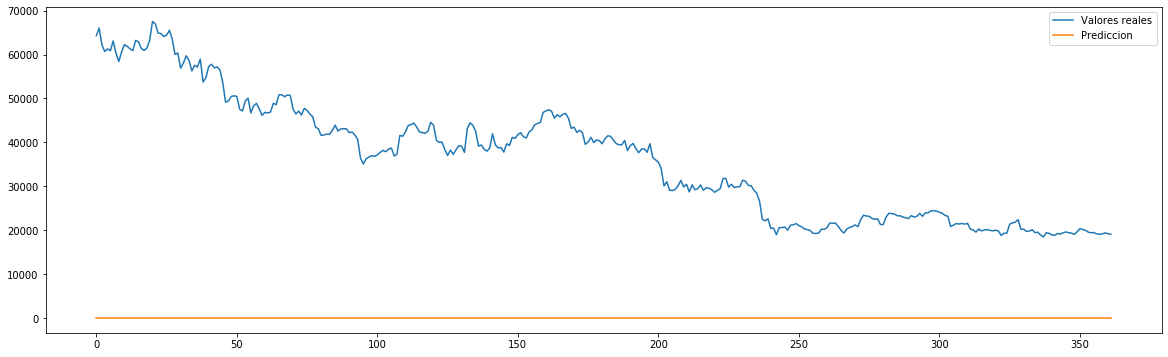

In [108]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [109]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 36099.45157458563
R-cuadrado: -7.001414021260263
Tasa de acierto de subida: 0.5401662049861495


Modelo 32 neuronas:

In [110]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_119 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_120 (LSTM)             (None, 35, 32)            8320      
                                                                 
 lstm_121 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_122 (LSTM)             (None, 16)                2112      
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [111]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 41ms/step - loss: 13628.6592 - mae: 13628.6592
Epoch 2/100
46/46 [==============================] - 2s 40ms/step - loss: 13718.5098 - mae: 13718.5098
Epoch 3/100
46/46 [==============================] - 2s 39ms/step - loss: 12282.4365 - mae: 12282.4365
Epoch 4/100
46/46 [==============================] - 2s 39ms/step - loss: 9888.2539 - mae: 9888.2539
Epoch 5/100
46/46 [==============================] - 2s 40ms/step - loss: 13589.2129 - mae: 13589.2129
Epoch 6/100
46/46 [==============================] - 2s 39ms/step - loss: 10937.3896 - mae: 10937.3896
Epoch 7/100
46/46 [==============================] - 2s 39ms/step - loss: 11394.7490 - mae: 11394.7490
Epoch 8/100
46/46 [==============================] - 2s 39ms/step - loss: 10160.4834 - mae: 10160.4834
Epoch 9/100
46/46 [==============================] - 2s 40ms/step - loss: 9232.3203 - mae: 9232.3203
Epoch 10/100
46/46 [==============================] - 2s 41ms/step - loss: 92

In [112]:
y_predLSTM32 = modelLSTM32.predict(testX3)

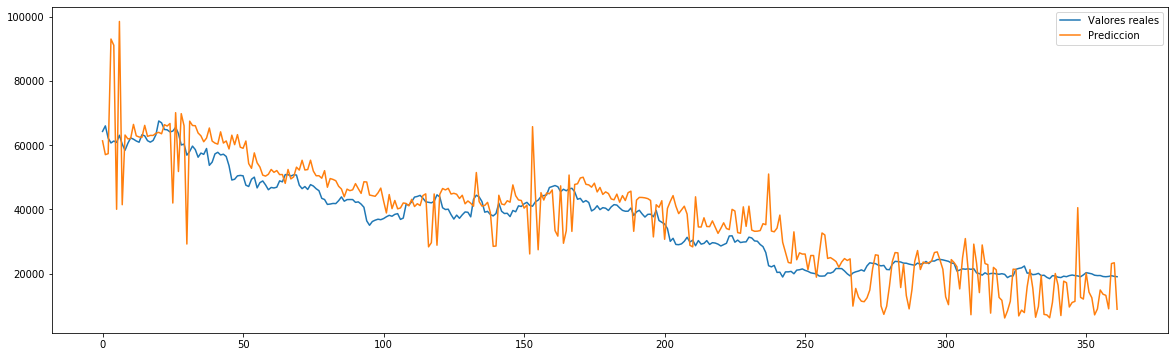

In [113]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [114]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 6257.162539709945
R-cuadrado: 0.6423569365156587
Tasa de acierto de subida: 0.518005540166205


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [115]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_123 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_124 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_125 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_126 (LSTM)             (None, 35, 25)            5900      
                                                                 
 lstm_127 (LSTM)             (None, 35, 20)            3680      
                                                                 
 lstm_128 (LSTM)             (None, 35, 17)            2584      
                                                                 
 lstm_129 (LSTM)             (None, 35, 14)          

In [116]:
y_predLSTM100 = modelLSTM100.predict(testX3)

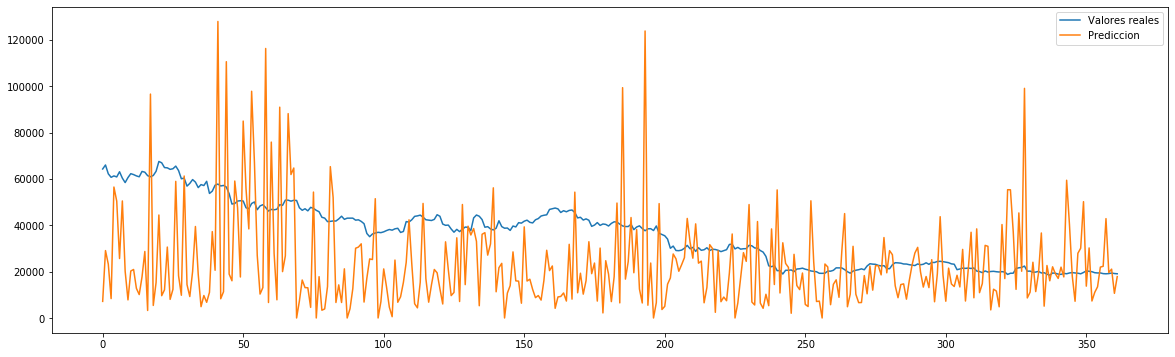

In [117]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [118]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 21046.016267265193
R-cuadrado: -2.734888891202073
Tasa de acierto de subida: 0.5235457063711911


Modelo 64 neuronas:

In [119]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_132 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_133 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_134 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_135 (LSTM)             (None, 35, 16)            2432      
                                                                 
 lstm_136 (LSTM)             (None, 35, 13)            1560      
                                                                 
 lstm_137 (LSTM)             (None, 35, 11)            1100      
                                                                 
 lstm_138 (LSTM)             (None, 35, 9)           

In [120]:
y_predLSTM64 = modelLSTM64.predict(testX3)

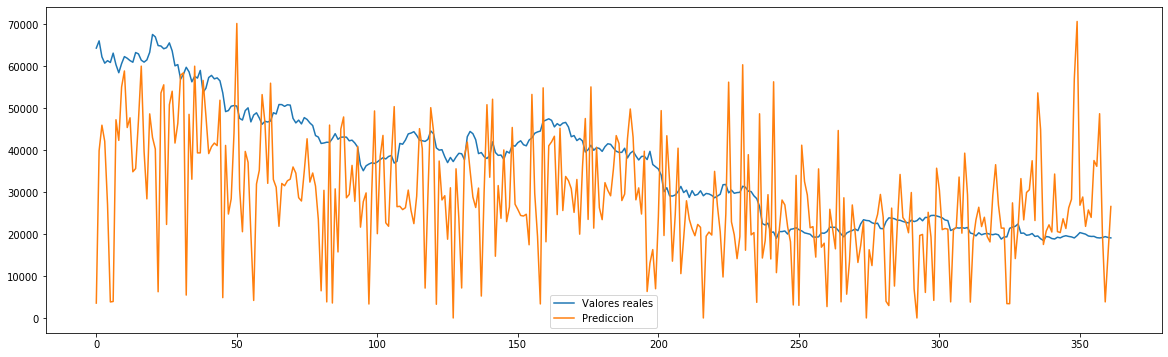

In [121]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [122]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 13058.180478785393
R-cuadrado: -0.5531834349816114
Tasa de acierto de subida: 0.518005540166205


Modelo 32 neuronas:

In [123]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_141 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_142 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_143 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_144 (LSTM)             (None, 35, 8)             640       
                                                                 
 lstm_145 (LSTM)             (None, 35, 6)             360       
                                                                 
 lstm_146 (LSTM)             (None, 35, 5)             240       
                                                                 
 lstm_147 (LSTM)             (None, 35, 5)           

In [124]:
y_predLSTM32 = modelLSTM32.predict(testX3)

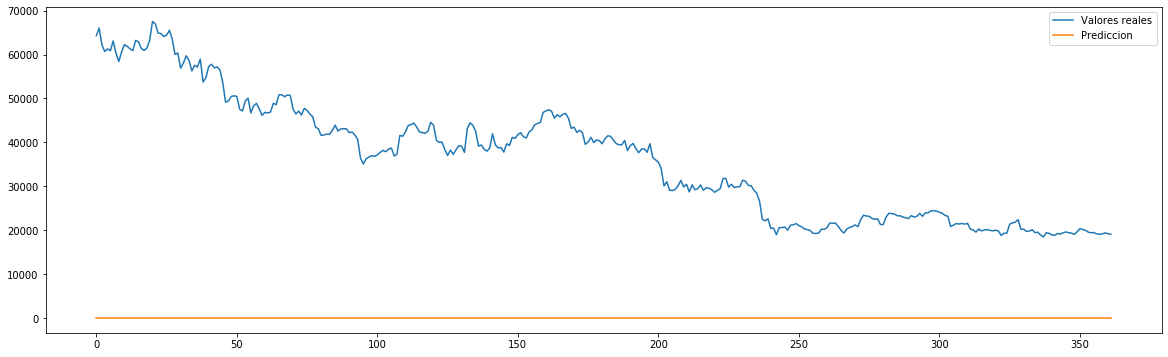

In [125]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [126]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 36099.45157458563
R-cuadrado: -7.001414021260263
Tasa de acierto de subida: 0.5401662049861495


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [127]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_150 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_151 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_152 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_153 (LSTM)             (None, 25)                5900      
                                                                 
 dense_25 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [128]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 20s 76ms/step - loss: 19537.1523
Epoch 2/100
46/46 [==============================] - 4s 78ms/step - loss: 16637.9082
Epoch 3/100
46/46 [==============================] - 4s 78ms/step - loss: 17117.0957
Epoch 4/100
46/46 [==============================] - 4s 79ms/step - loss: 17140.7324
Epoch 5/100
46/46 [==============================] - 4s 77ms/step - loss: 16478.1484
Epoch 6/100
46/46 [==============================] - 3s 68ms/step - loss: 17294.7305
Epoch 7/100
46/46 [==============================] - 3s 64ms/step - loss: 16145.5166
Epoch 8/100
46/46 [==============================] - 3s 69ms/step - loss: 16055.0918
Epoch 9/100
46/46 [==============================] - 4s 81ms/step - loss: 16088.0889
Epoch 10/100
46/46 [==============================] - 4s 81ms/step - loss: 15371.6289
Epoch 11/100
46/46 [==============================] - 4s 76ms/step - loss: 15046.7891
Epoch 12/100
46/46 [==============================] - 4s 77ms/

In [129]:
y_predLSTM100 = modelLSTM100.predict(testX3)

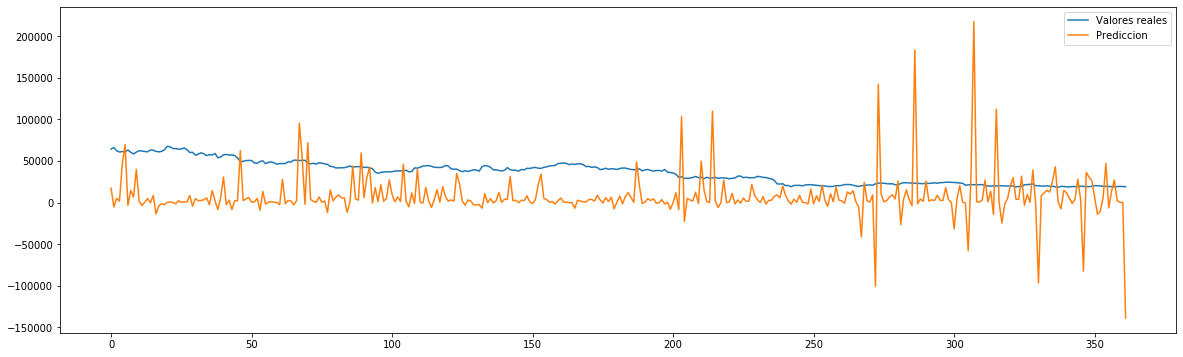

In [130]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [131]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 34324.02513787376
R-cuadrado: -8.207339025216694
Tasa de acierto de subida: 0.48753462603878117


Modelo 64 neuronas

In [132]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_154 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_155 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_156 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_157 (LSTM)             (None, 16)                2432      
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [133]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 15s 56ms/step - loss: 11898.1416
Epoch 2/100
46/46 [==============================] - 3s 54ms/step - loss: 11719.8477
Epoch 3/100
46/46 [==============================] - 3s 55ms/step - loss: 11655.0039
Epoch 4/100
46/46 [==============================] - 2s 54ms/step - loss: 11007.0957
Epoch 5/100
46/46 [==============================] - 3s 57ms/step - loss: 10412.2588
Epoch 6/100
46/46 [==============================] - 3s 57ms/step - loss: 10341.7539
Epoch 7/100
46/46 [==============================] - 2s 53ms/step - loss: 10388.4443
Epoch 8/100
46/46 [==============================] - 3s 57ms/step - loss: 10282.2461
Epoch 9/100
46/46 [==============================] - 3s 63ms/step - loss: 11195.7871
Epoch 10/100
46/46 [==============================] - 2s 52ms/step - loss: 10388.3252
Epoch 11/100
46/46 [==============================] - 3s 56ms/step - loss: 10059.3008
Epoch 12/100
46/46 [==============================] - 3s 74ms/

In [134]:
y_predLSTM64 = modelLSTM64.predict(testX3)

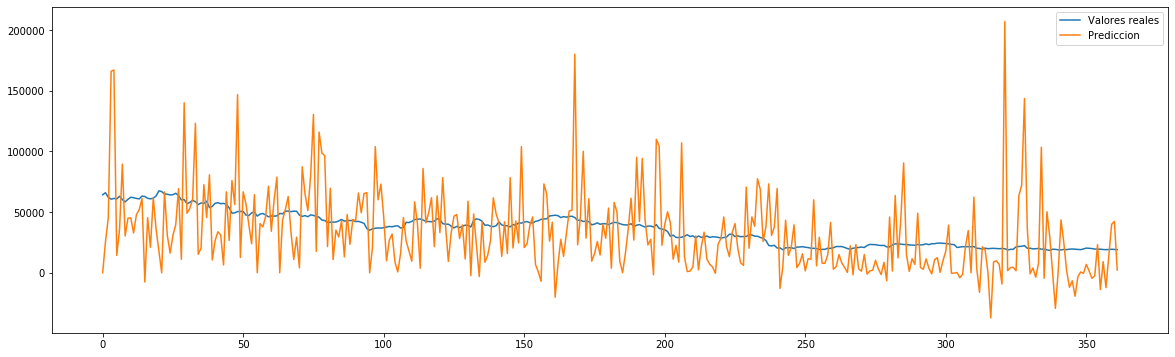

In [135]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [136]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 23998.640007136455
R-cuadrado: -4.545019642321938
Tasa de acierto de subida: 0.48476454293628807


Modelo 32 neuronas:

In [137]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_158 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_159 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_160 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_161 (LSTM)             (None, 8)                 640       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [138]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 13s 47ms/step - loss: 16542.2539
Epoch 2/100
46/46 [==============================] - 2s 50ms/step - loss: 16140.8652
Epoch 3/100
46/46 [==============================] - 2s 51ms/step - loss: 16087.9238
Epoch 4/100
46/46 [==============================] - 2s 52ms/step - loss: 15939.9902
Epoch 5/100
46/46 [==============================] - 2s 48ms/step - loss: 15948.2822
Epoch 6/100
46/46 [==============================] - 2s 46ms/step - loss: 15945.9268
Epoch 7/100
46/46 [==============================] - 2s 39ms/step - loss: 15853.4141
Epoch 8/100
46/46 [==============================] - 2s 47ms/step - loss: 16103.4346
Epoch 9/100
46/46 [==============================] - 3s 56ms/step - loss: 16017.4277
Epoch 10/100
46/46 [==============================] - 3s 60ms/step - loss: 15812.0010
Epoch 11/100
46/46 [==============================] - 3s 59ms/step - loss: 15868.0332
Epoch 12/100
46/46 [==============================] - 3s 55ms/

In [139]:
y_predLSTM32 = modelLSTM32.predict(testX3)

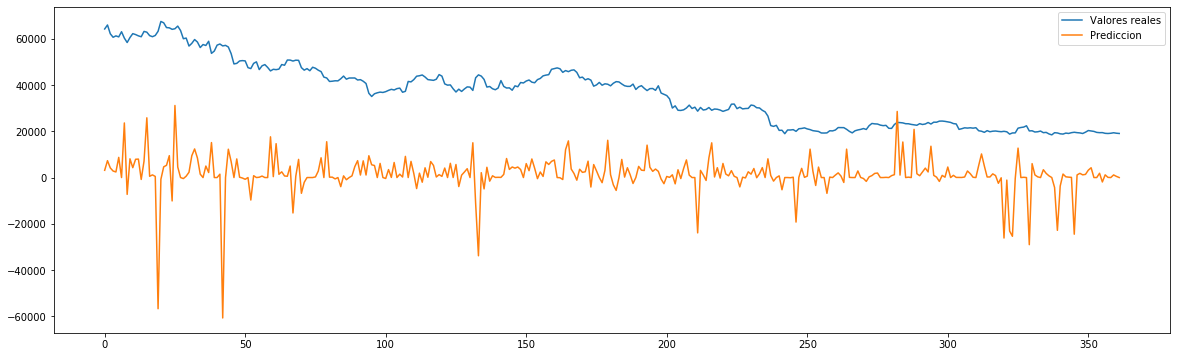

In [140]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [141]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 34751.83211715195
R-cuadrado: -6.699129936692275
Tasa de acierto de subida: 0.4626038781163435


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [142]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_162 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_163 (LSTM)             (None, 35, 100)           80400     
                                                                 
 lstm_164 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_165 (LSTM)             (None, 50)                20200     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [143]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 18s 110ms/step - loss: 12843.2344 - mae: 12843.2344
Epoch 2/100
46/46 [==============================] - 4s 95ms/step - loss: 12874.1943 - mae: 12874.1943
Epoch 3/100
46/46 [==============================] - 4s 93ms/step - loss: 12888.6016 - mae: 12888.6016
Epoch 4/100
46/46 [==============================] - 4s 82ms/step - loss: 12844.7539 - mae: 12844.7539
Epoch 5/100
46/46 [==============================] - 4s 89ms/step - loss: 12452.0859 - mae: 12452.0859
Epoch 6/100
46/46 [==============================] - 5s 109ms/step - loss: 12556.5342 - mae: 12556.5342
Epoch 7/100
46/46 [==============================] - 5s 110ms/step - loss: 12560.6631 - mae: 12560.6631
Epoch 8/100
46/46 [==============================] - 5s 109ms/step - loss: 12634.0391 - mae: 12634.0391
Epoch 9/100
46/46 [==============================] - 4s 89ms/step - loss: 12736.2686 - mae: 12736.2686
Epoch 10/100
46/46 [==============================] - 4s 80ms/step -

In [144]:
y_predLSTM100 = modelLSTM100.predict(testX3)

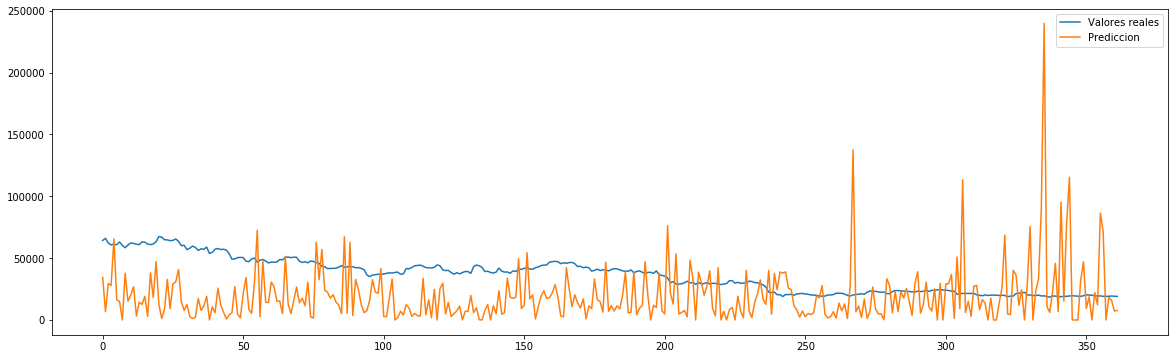

In [145]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [146]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 25720.406220184243
R-cuadrado: -4.616162192609984
Tasa de acierto de subida: 0.49584487534626037


Modelo 64 neuronas

In [147]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_166 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_167 (LSTM)             (None, 35, 64)            33024     
                                                                 
 lstm_168 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_169 (LSTM)             (None, 32)                8320      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [148]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 52ms/step - loss: 17537.6172 - mae: 17537.6172
Epoch 2/100
46/46 [==============================] - 2s 51ms/step - loss: 16378.9463 - mae: 16378.9463
Epoch 3/100
46/46 [==============================] - 2s 51ms/step - loss: 16441.5117 - mae: 16441.5117
Epoch 4/100
46/46 [==============================] - 2s 53ms/step - loss: 17100.8105 - mae: 17100.8105
Epoch 5/100
46/46 [==============================] - 2s 52ms/step - loss: 16061.7451 - mae: 16061.7451
Epoch 6/100
46/46 [==============================] - 2s 54ms/step - loss: 16731.8398 - mae: 16731.8398
Epoch 7/100
46/46 [==============================] - 2s 49ms/step - loss: 17347.6211 - mae: 17347.6211
Epoch 8/100
46/46 [==============================] - 2s 51ms/step - loss: 17399.7812 - mae: 17399.7812
Epoch 9/100
46/46 [==============================] - 2s 51ms/step - loss: 18211.9746 - mae: 18211.9746
Epoch 10/100
46/46 [==============================] - 2s 52ms/step - loss

In [149]:
y_predLSTM64 = modelLSTM64.predict(testX3)

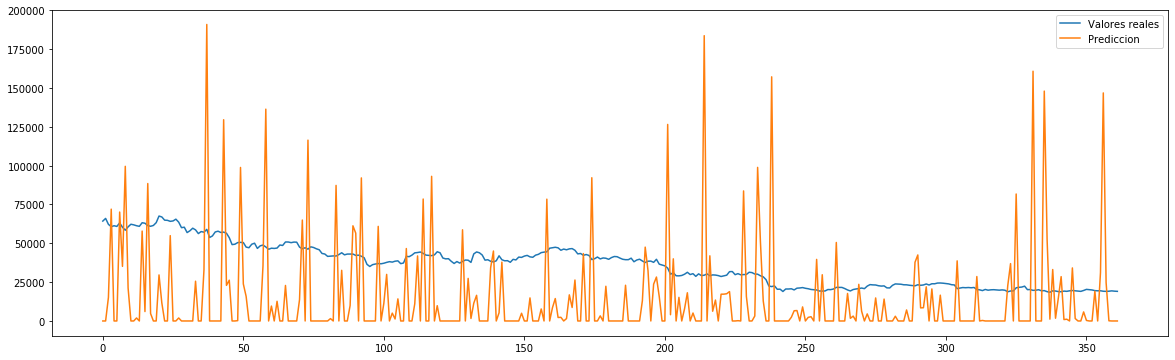

In [150]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [151]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33083.560277540506
R-cuadrado: -7.247086609186031
Tasa de acierto de subida: 0.5373961218836565


Modelo 32 neuronas:

In [152]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_170 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_171 (LSTM)             (None, 35, 32)            8320      
                                                                 
 lstm_172 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_173 (LSTM)             (None, 16)                2112      
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [153]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 10s 41ms/step - loss: 15062.8770 - mae: 15062.8770
Epoch 2/100
46/46 [==============================] - 2s 41ms/step - loss: 14934.8945 - mae: 14934.8945
Epoch 3/100
46/46 [==============================] - 2s 40ms/step - loss: 14612.6123 - mae: 14612.6123
Epoch 4/100
46/46 [==============================] - 2s 40ms/step - loss: 15320.1797 - mae: 15320.1797
Epoch 5/100
46/46 [==============================] - 2s 41ms/step - loss: 15269.2275 - mae: 15269.2275
Epoch 6/100
46/46 [==============================] - 2s 40ms/step - loss: 15238.9072 - mae: 15238.9072
Epoch 7/100
46/46 [==============================] - 2s 39ms/step - loss: 14572.8711 - mae: 14572.8711
Epoch 8/100
46/46 [==============================] - 2s 40ms/step - loss: 14620.9082 - mae: 14620.9082
Epoch 9/100
46/46 [==============================] - 2s 40ms/step - loss: 15101.6367 - mae: 15101.6367
Epoch 10/100
46/46 [==============================] - 2s 41ms/step - los

In [154]:
y_predLSTM32 = modelLSTM32.predict(testX3)

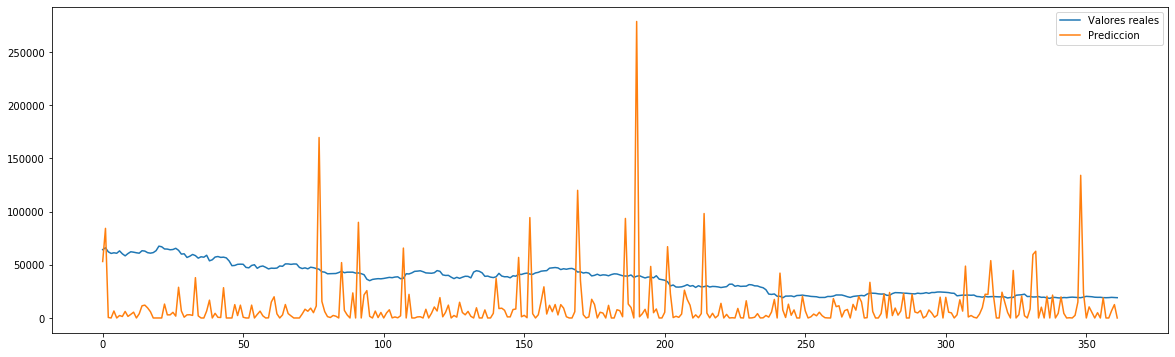

In [155]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [156]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 31667.718759701253
R-cuadrado: -6.6150728201345785
Tasa de acierto de subida: 0.4930747922437673


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [157]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_174 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_175 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_176 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_177 (LSTM)             (None, 35, 25)            5900      
                                                                 
 lstm_178 (LSTM)             (None, 35, 20)            3680      
                                                                 
 lstm_179 (LSTM)             (None, 35, 17)            2584      
                                                                 
 lstm_180 (LSTM)             (None, 35, 14)          

In [158]:
y_predLSTM100 = modelLSTM100.predict(testX3)

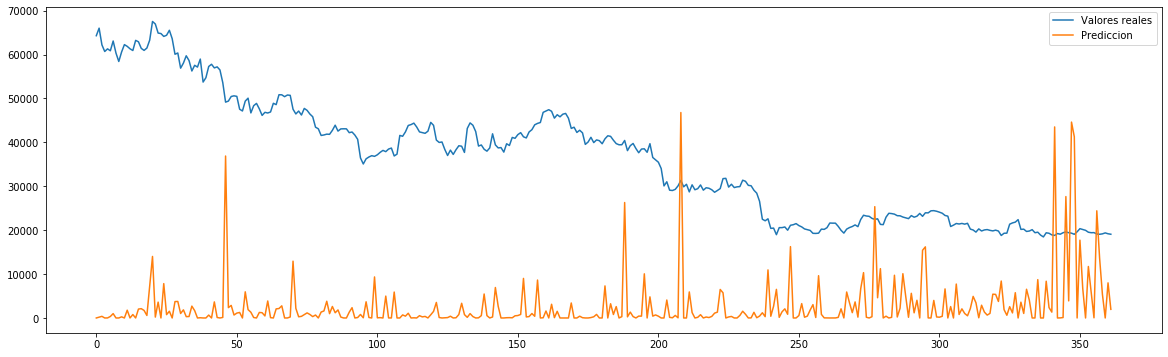

In [159]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [160]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33964.53345189033
R-cuadrado: -6.368488520303722
Tasa de acierto de subida: 0.5069252077562327


Modelo 64 neuronas:

In [161]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_183 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_184 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_185 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_186 (LSTM)             (None, 35, 16)            2432      
                                                                 
 lstm_187 (LSTM)             (None, 35, 13)            1560      
                                                                 
 lstm_188 (LSTM)             (None, 35, 11)            1100      
                                                                 
 lstm_189 (LSTM)             (None, 35, 9)           

In [162]:
y_predLSTM64 = modelLSTM64.predict(testX3)

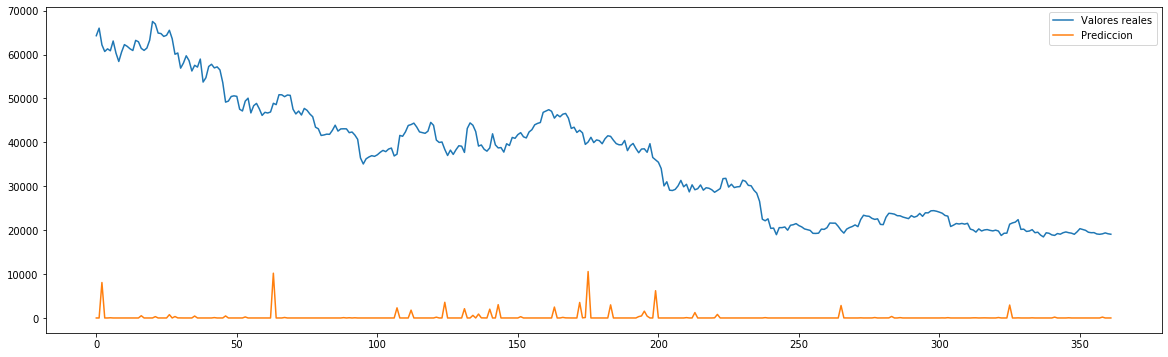

In [163]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [164]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35887.00791744021
R-cuadrado: -6.911590678032724
Tasa de acierto de subida: 0.4903047091412742


Modelo 32 neuronas:

In [165]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_192 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_193 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_194 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_195 (LSTM)             (None, 35, 8)             640       
                                                                 
 lstm_196 (LSTM)             (None, 35, 6)             360       
                                                                 
 lstm_197 (LSTM)             (None, 35, 5)             240       
                                                                 
 lstm_198 (LSTM)             (None, 35, 5)           

46/46 [==============================] - 4s 98ms/step - loss: 16148.6689 - mae: 16148.6689
Epoch 64/100
46/46 [==============================] - 4s 96ms/step - loss: 16148.6963 - mae: 16148.6963
Epoch 65/100
46/46 [==============================] - 5s 105ms/step - loss: 16148.7422 - mae: 16148.7422
Epoch 66/100
46/46 [==============================] - 5s 101ms/step - loss: 16149.2559 - mae: 16149.2559
Epoch 67/100
46/46 [==============================] - 4s 84ms/step - loss: 16148.5498 - mae: 16148.5498
Epoch 68/100
46/46 [==============================] - 4s 83ms/step - loss: 16148.5527 - mae: 16148.5527
Epoch 69/100
46/46 [==============================] - 4s 85ms/step - loss: 16148.3242 - mae: 16148.3242
Epoch 70/100
46/46 [==============================] - 4s 81ms/step - loss: 16148.5400 - mae: 16148.5400
Epoch 71/100
46/46 [==============================] - 4s 84ms/step - loss: 16148.5127 - mae: 16148.5127
Epoch 72/100
46/46 [==============================] - 4s 82ms/step - loss: 

In [166]:
y_predLSTM32 = modelLSTM32.predict(testX3)

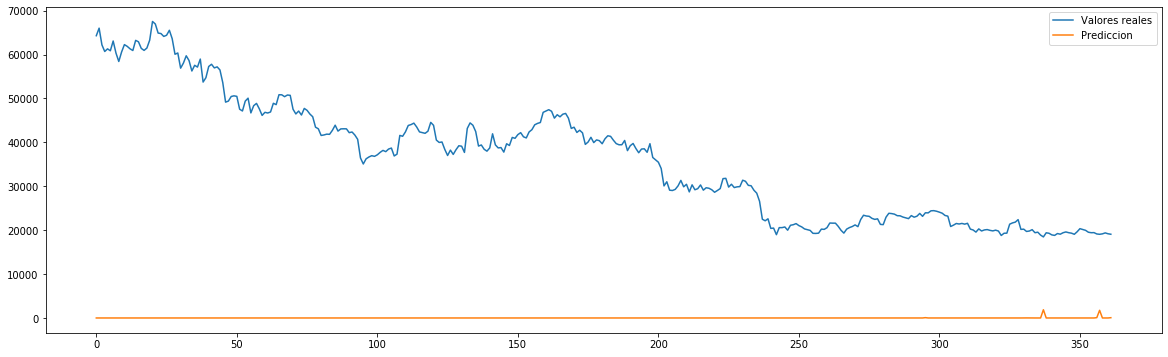

In [167]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [168]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 36088.17157837436
R-cuadrado: -6.999132790396278
Tasa de acierto de subida: 0.47368421052631576
